# Identify Customer Segments

In this project, I applied unsupervised learning techniques (PCA and KMeans) to identify segments of the population that form the core customer base for a mail-order sales company in Germany. These segments could  be used to direct marketing campaigns towards audiences that will have the highest expected rate of returns. The data that I used was provided by Udacity partners at Bertelsmann Arvato Analytics.


In [2]:
# import libraries here; add more as necessary
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ast import literal_eval

# magic word for producing visualizations in notebook
%matplotlib inline

### Step 0: Load the Data

There are four files associated with this project (not including this one):

- `Udacity_AZDIAS_Subset.csv`: Demographics data for the general population of Germany; 891211 persons (rows) x 85 features (columns).
- `Udacity_CUSTOMERS_Subset.csv`: Demographics data for customers of a mail-order company; 191652 persons (rows) x 85 features (columns).
- `Data_Dictionary.md`: Detailed information file about the features in the provided datasets.
- `AZDIAS_Feature_Summary.csv`: Summary of feature attributes for demographics data; 85 features (rows) x 4 columns

Each row of the demographics files represents a single person, but also includes information outside of individuals, including information about their household, building, and neighborhood. I used this information to cluster the general population into groups with similar demographic properties. Then, I used it to see how the people in the customers dataset fit into those created clusters. 



In [3]:
# Load in the general demographics data.
azdias = pd.read_csv('Udacity_AZDIAS_Subset.csv', sep=';')

# Load in the feature summary file.
feat_info = pd.read_csv('AZDIAS_Feature_Summary.csv',sep=';')

In [4]:
# Check the structure of the data after it's loaded (e.g. print the number of
# rows and columns, print the first few rows).

azdias.shape, feat_info.shape

((891221, 85), (85, 4))

In [5]:
azdias.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891221 entries, 0 to 891220
Data columns (total 85 columns):
AGER_TYP                 891221 non-null int64
ALTERSKATEGORIE_GROB     891221 non-null int64
ANREDE_KZ                891221 non-null int64
CJT_GESAMTTYP            886367 non-null float64
FINANZ_MINIMALIST        891221 non-null int64
FINANZ_SPARER            891221 non-null int64
FINANZ_VORSORGER         891221 non-null int64
FINANZ_ANLEGER           891221 non-null int64
FINANZ_UNAUFFAELLIGER    891221 non-null int64
FINANZ_HAUSBAUER         891221 non-null int64
FINANZTYP                891221 non-null int64
GEBURTSJAHR              891221 non-null int64
GFK_URLAUBERTYP          886367 non-null float64
GREEN_AVANTGARDE         891221 non-null int64
HEALTH_TYP               891221 non-null int64
LP_LEBENSPHASE_FEIN      886367 non-null float64
LP_LEBENSPHASE_GROB      886367 non-null float64
LP_FAMILIE_FEIN          886367 non-null float64
LP_FAMILIE_GROB          886367 n

In [6]:
azdias.sample(10)

,AGER_TYP,ALTERSKATEGORIE_GROB,ANREDE_KZ,CJT_GESAMTTYP,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,...,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_BAUMAX,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB
69904,2,4,1,2.0,5,1,5,2,1,3,...,3.0,3.0,1.0,0.0,1.0,3.0,3.0,3.0,3.0,1.0
620188,2,4,2,6.0,4,1,5,1,2,4,...,2.0,3.0,2.0,1.0,1.0,5.0,5.0,4.0,6.0,5.0
214593,-1,2,1,4.0,4,4,2,4,4,2,...,3.0,2.0,1.0,0.0,1.0,3.0,3.0,2.0,2.0,1.0
804229,-1,3,2,2.0,4,2,4,3,2,1,...,4.0,1.0,0.0,0.0,1.0,2.0,3.0,2.0,4.0,3.0
219776,1,3,1,3.0,5,1,4,2,1,2,...,3.0,1.0,0.0,0.0,1.0,3.0,5.0,4.0,1.0,3.0
789868,-1,3,1,6.0,3,4,3,5,5,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
655326,1,1,1,5.0,3,1,5,1,1,4,...,1.0,3.0,3.0,2.0,4.0,3.0,1.0,4.0,7.0,5.0
686525,-1,1,1,3.0,1,5,3,5,5,5,...,2.0,3.0,2.0,1.0,1.0,3.0,3.0,3.0,5.0,3.0
611924,-1,2,2,6.0,3,4,3,5,5,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
848001,2,3,1,3.0,5,1,5,1,2,2,...,3.0,3.0,0.0,0.0,1.0,3.0,4.0,3.0,1.0,2.0


In [6]:
feat_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 4 columns):
attribute             85 non-null object
information_level     85 non-null object
type                  85 non-null object
missing_or_unknown    85 non-null object
dtypes: object(4)
memory usage: 2.7+ KB


In [7]:
feat_info.head()

,attribute,information_level,type,missing_or_unknown
0,AGER_TYP,person,categorical,"[-1,0]"
1,ALTERSKATEGORIE_GROB,person,ordinal,"[-1,0,9]"
2,ANREDE_KZ,person,categorical,"[-1,0]"
3,CJT_GESAMTTYP,person,categorical,[0]
4,FINANZ_MINIMALIST,person,ordinal,[-1]


In [8]:
feat_info.type.unique(), feat_info.information_level.unique(), feat_info.missing_or_unknown.unique()

(array(['categorical', 'ordinal', 'numeric', 'mixed', 'interval'],
       dtype=object),
 array(['person', 'household', 'building', 'microcell_rr4',
        'microcell_rr3', 'postcode', 'region_rr1', 'macrocell_plz8',
        'community'], dtype=object),
 array(['[-1,0]', '[-1,0,9]', '[0]', '[-1]', '[]', '[-1,9]', '[-1,X]',
        '[XX]', '[-1,XX]'], dtype=object))

In [9]:
#Explore Numeric Type Columns in the AZDIAS df
numeric_feats = feat_info.query('type == "numeric"')

new_az = azdias[list(numeric_feats.attribute)]
new_az.describe()

,GEBURTSJAHR,ANZ_PERSONEN,ANZ_TITEL,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,MIN_GEBAEUDEJAHR,KBA13_ANZAHL_PKW
count,891221.000000,817722.000000,817722.000000,798073.000000,794213.000000,798073.000000,785421.000000
mean,1101.178533,1.727637,0.004162,8.287263,0.040647,1993.277011,619.701439
std,976.583551,1.155849,0.068855,15.628087,0.324028,3.332739,340.034318
min,0.000000,0.000000,0.000000,0.000000,0.000000,1985.000000,0.000000
25%,0.000000,1.000000,0.000000,1.000000,0.000000,1992.000000,384.000000
50%,1943.000000,1.000000,0.000000,4.000000,0.000000,1992.000000,549.000000
75%,1970.000000,2.000000,0.000000,9.000000,0.000000,1993.000000,778.000000
max,2017.000000,45.000000,6.000000,595.000000,23.000000,2016.000000,2300.000000


In [10]:
#look at an categorical variable vs ordinal 
azdias.FINANZTYP.unique(), azdias.REGIOTYP.unique()

(array([4, 1, 6, 5, 2, 3]),
 array([nan,  3.,  2.,  0.,  5.,  1.,  7.,  6.,  4.]))


## Step 1: Preprocessing



#### Step 1.1.2: Assess Missing Data in Each Column



In [11]:
# Perform an assessment of how much missing data there is in each column of the
# dataset.
#look at NaN values 
azdias[azdias.isnull().any(axis=1)]
#lots of rows with missing values 

,AGER_TYP,ALTERSKATEGORIE_GROB,ANREDE_KZ,CJT_GESAMTTYP,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,...,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_BAUMAX,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB
0,-1,2,1,2.0,3,4,3,5,5,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-1,1,2,5.0,1,5,2,5,4,5,...,2.0,3.0,2.0,1.0,1.0,5.0,4.0,3.0,5.0,4.0
2,-1,3,2,3.0,1,4,1,2,3,5,...,3.0,3.0,1.0,0.0,1.0,4.0,4.0,3.0,5.0,2.0
3,2,4,2,2.0,4,2,5,2,1,2,...,2.0,2.0,2.0,0.0,1.0,3.0,4.0,2.0,3.0,3.0
6,-1,2,2,5.0,1,5,1,5,4,3,...,3.0,3.0,1.0,0.0,1.0,5.0,5.0,4.0,6.0,3.0
7,-1,1,1,3.0,3,3,4,1,3,2,...,3.0,3.0,1.0,0.0,1.0,4.0,4.0,2.0,5.0,2.0
8,-1,3,1,3.0,4,4,2,4,2,2,...,2.0,3.0,2.0,1.0,1.0,3.0,3.0,2.0,4.0,3.0
10,0,3,2,1.0,2,2,5,3,1,5,...,2.0,4.0,2.0,0.0,2.0,3.0,3.0,4.0,6.0,5.0
11,-1,2,1,6.0,3,4,3,5,5,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,-1,3,1,6.0,5,3,4,2,4,1,...,3.0,3.0,1.0,0.0,1.0,5.0,5.0,3.0,6.0,4.0


In [12]:
#which columns have NaN values 
azdias.isna().sum()

AGER_TYP                      0
ALTERSKATEGORIE_GROB          0
ANREDE_KZ                     0
CJT_GESAMTTYP              4854
FINANZ_MINIMALIST             0
FINANZ_SPARER                 0
FINANZ_VORSORGER              0
FINANZ_ANLEGER                0
FINANZ_UNAUFFAELLIGER         0
FINANZ_HAUSBAUER              0
FINANZTYP                     0
GEBURTSJAHR                   0
GFK_URLAUBERTYP            4854
GREEN_AVANTGARDE              0
HEALTH_TYP                    0
LP_LEBENSPHASE_FEIN        4854
LP_LEBENSPHASE_GROB        4854
LP_FAMILIE_FEIN            4854
LP_FAMILIE_GROB            4854
LP_STATUS_FEIN             4854
LP_STATUS_GROB             4854
NATIONALITAET_KZ              0
PRAEGENDE_JUGENDJAHRE         0
RETOURTYP_BK_S             4854
SEMIO_SOZ                     0
SEMIO_FAM                     0
SEMIO_REL                     0
SEMIO_MAT                     0
SEMIO_VERT                    0
SEMIO_LUST                    0
                          ...  
OST_WEST

In [13]:
#what about missing coded missing information. for example... 
#azdias[feat_info.attribute.values[0]].isin(list(feat_info.missing_or_unknown[0]))
azdias[feat_info.attribute.values[0]].isin(literal_eval(list(feat_info.missing_or_unknown)[0])).sum()
var = feat_info.attribute.values[0] 
var

'AGER_TYP'

In [4]:
#convert coded missing information to NAN values 
#find unique missing value codes
unique_code_miss = feat_info.missing_or_unknown.unique()
unique_code_miss= np.delete(unique_code_miss,4)
unique_code_miss

array(['[-1,0]', '[-1,0,9]', '[0]', '[-1]', '[-1,9]', '[-1,X]', '[XX]',
       '[-1,XX]'], dtype=object)

In [5]:
#make dictionaries
dict0 = {-1:np.NaN, 0:np.NaN}
dict1 = {-1:np.NaN, 0:np.NaN, 9:np.NaN}
dict2 = {0:np.NaN}
dict3 = {-1:np.NaN}
dict4 = { -1:np.NaN, 9:np.NaN}
dict5 = { -1:np.NaN, 'X':np.NaN}
dict6 = { 'XX':np.NaN}
dict7 = { -1:np.NaN, 'XX':np.NaN}

dicts = [dict0, dict1, dict2, dict3, dict4, dict5, dict6, dict7]
dicts[0]

{-1: nan, 0: nan}

In [6]:
#make a copy of the dataset that we can store the replacements in
# loop through the dataset
azdias_replaced= azdias.copy()
for i in range(0, len(unique_code_miss)):
    d = list(feat_info[feat_info['missing_or_unknown'] == unique_code_miss[i]].attribute.values)
    azdias_replaced[d] = azdias_replaced[d].replace(dicts[i])


In [17]:
#test the shape to make sure we havent accidentally dropped anything
azdias_replaced.shape

(891221, 85)

In [18]:
#test to make sure it did replacement
azdias_replaced.AGER_TYP.head()

0    NaN
1    NaN
2    NaN
3    2.0
4    NaN
Name: AGER_TYP, dtype: float64

In [7]:
#summarize the number of missing values for each variable
missing = pd.DataFrame(azdias_replaced.isna().sum(axis=0))
missing.index.name = 'Var'
missing.reset_index(inplace=True)

In [8]:
#identify outlier variables
missing.head()
missing.columns=['Var', 'MissingCnt']
missing['Percent'] = (missing['MissingCnt']/azdias_replaced.shape[0])*100
missing.sort_values(by=['Percent'], ascending=False, inplace=True)
missing

,Var,MissingCnt,Percent
40,TITEL_KZ,889061,99.757636
0,AGER_TYP,685843,76.955435
47,KK_KUNDENTYP,584612,65.596749
64,KBA05_BAUMAX,476524,53.468668
11,GEBURTSJAHR,392318,44.020282
43,ALTER_HH,310267,34.813699
70,KKK,158064,17.735668
73,REGIOTYP,158064,17.735668
48,W_KEIT_KIND_HH,147988,16.605084
60,KBA05_ANTG1,133324,14.959701


In [21]:
#check to another random column to see that it replaced as expected for when missing was []
azdias_replaced.WOHNLAGE.value_counts(), azdias_replaced.WOHNLAGE.isna().sum()

(3.0    249719
 7.0    169318
 4.0    135973
 2.0    100376
 5.0     74346
 1.0     43918
 8.0     17473
 0.0      6950
 Name: WOHNLAGE, dtype: int64, 93148)

In [22]:
azdias.WOHNLAGE.value_counts(), azdias.WOHNLAGE.isna().sum()
#the results from this cell matches the above one so that is good

(3.0    249719
 7.0    169318
 4.0    135973
 2.0    100376
 5.0     74346
 1.0     43918
 8.0     17473
 0.0      6950
 Name: WOHNLAGE, dtype: int64, 93148)

In [ ]:
#remove outlier columns

In [8]:
#these are the top 6 columns that seem to have a large amount of information missing.
#remove these for now
list(missing.Var.values[0:6])

['TITEL_KZ',
 'AGER_TYP',
 'KK_KUNDENTYP',
 'KBA05_BAUMAX',
 'GEBURTSJAHR',
 'ALTER_HH']

In [9]:
#remove outlier columns
az_red = azdias_replaced.drop(columns=list(missing.Var.values[0:6]))

In [25]:
#check to NaN again
az_red.isna().sum(axis=0)
#as hoped, AGER_TYP has been removed as well as others - this is good. 

Var
ALTERSKATEGORIE_GROB       2881
ANREDE_KZ                     0
CJT_GESAMTTYP              4854
FINANZ_MINIMALIST             0
FINANZ_SPARER                 0
FINANZ_VORSORGER              0
FINANZ_ANLEGER                0
FINANZ_UNAUFFAELLIGER         0
FINANZ_HAUSBAUER              0
FINANZTYP                     0
GFK_URLAUBERTYP            4854
GREEN_AVANTGARDE              0
HEALTH_TYP               111196
LP_LEBENSPHASE_FEIN       97632
LP_LEBENSPHASE_GROB       94572
LP_FAMILIE_FEIN           77792
LP_FAMILIE_GROB           77792
LP_STATUS_FEIN             4854
LP_STATUS_GROB             4854
NATIONALITAET_KZ         108315
PRAEGENDE_JUGENDJAHRE    108164
RETOURTYP_BK_S             4854
SEMIO_SOZ                     0
SEMIO_FAM                     0
SEMIO_REL                     0
SEMIO_MAT                     0
SEMIO_VERT                    0
SEMIO_LUST                    0
SEMIO_ERL                     0
SEMIO_KULT                    0
                          ...  
MIN_

In [26]:
#test the shape one more time
az_red.shape
#shape should be (891221, 85 - #dropped variables) 

(891221, 79)

#### Discussion 1.1.2: Assess Missing Data in Each Column
I removed variables which were obviously outliers. These five variables had greater than 25% of the observations missing.

**TITEL_KZ** - academic title flag Academic title flag. Missing for 99.757636% of entries.   
**AGER-TYPE** (Best-ager typology) Missing for 76.955435% of entries.   
**KK_KUNDENTYP** Consumer pattern over past 12 months. Missing for 65.596749% of entries.   
**KBA05_BAUMAX** Most common building type within the microcell. Missing for 53.468668% of entries  
**GEBURTSJAHR** (Year of birth) Missing for 44.020282% of entries.     
**ALTER_HH** Birthdate of head of household. Missing for 34.813699% of entries.     
 
 The other variables with missing information seem to have a pattern of missingness. For example, KKK and REGIOTYP	are missing data at the same frequency so perhaps we can isolate and remove these data points. This seems to be the case for many variables. We can assess missing data by row (person) below. If we remove some rows it may alleviate our missing information problem. 

#### Step 1.1.3: Assess Missing Data in Each Row



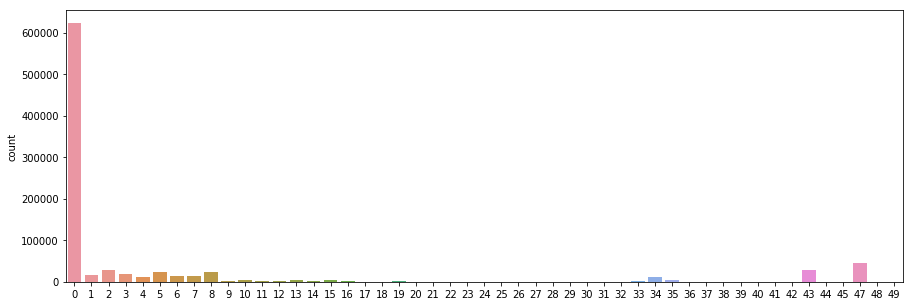

In [14]:
#search through the variables that have missing information
#define a df that has the variables that have missing information
plt.figure(figsize=(15,5))
sns.countplot(az_red.isna().sum(axis=1))

In [11]:
#summary stats of rows with missing information
#max missing is 49 entries
#on average each row (person) is missing 5 entries (high outlier is affecting that though)
# 75% quantile is 3 or more missing
# 
az_red.isna().sum(axis=1).max(), az_red.isna().sum(axis=1).min(), az_red.isna().sum(axis=1).describe(), az_red.isna().sum(axis=1).value_counts()

(49, 0, count    891221.000000
 mean          5.649894
 std          13.234687
 min           0.000000
 25%           0.000000
 50%           0.000000
 75%           3.000000
 max          49.000000
 dtype: float64, 0     623209
 47     45578
 2      27926
 43     27369
 8      24592
 5      22515
 3      17629
 1      15738
 6      13771
 7      13714
 4      12607
 34     10816
 10      5410
 15      4743
 35      3911
 13      3255
 9       3042
 33      2985
 16      2505
 14      2243
 19      1180
 11      1127
 12       766
 17       677
 37       538
 45       494
 18       428
 38       421
 41       356
 20       349
 32       206
 44       155
 21       150
 40       137
 23       132
 22       129
 36        84
 39        77
 24        69
 26        59
 25        55
 27        24
 42        21
 29        12
 30         6
 28         5
 31         3
 49         2
 48         1
 dtype: int64)

In [10]:
#based on above plot separate at missing for 15 pts 
#get index values 
missing_by_row = pd.DataFrame(az_red.isna().sum(axis=1), columns=['missingcnt'])

#select the ones that are few missing
few_missing = az_red.iloc[missing_by_row.query('missingcnt <=15').index]
#then use this selection to grab the remaining
many_missing = az_red.drop(few_missing.index)


In [16]:
#make sure I havent dropped any rows or columns
missing_by_row.shape,few_missing.shape, many_missing.shape

((891221, 1), (792287, 79), (98934, 79))

In [17]:
#check to make sure our slicnig worked
few_missing.isna().sum(axis=1).describe(), many_missing.isna().sum(axis=1).describe()

(count    792287.000000
 mean          1.149544
 std           2.714117
 min           0.000000
 25%           0.000000
 50%           0.000000
 75%           0.000000
 max          15.000000
 dtype: float64, count    98934.000000
 mean        41.689763
 std          7.602489
 min         16.000000
 25%         38.000000
 50%         43.000000
 75%         47.000000
 max         49.000000
 dtype: float64)

In [18]:
#first get columns with no missing values for each subset
#few_missing.isna().sum(axis=0)[1:6], 
many_missing.isna().sum(axis=0)[1:60]

Var
ANREDE_KZ                    0
CJT_GESAMTTYP              486
FINANZ_MINIMALIST            0
FINANZ_SPARER                0
FINANZ_VORSORGER             0
FINANZ_ANLEGER               0
FINANZ_UNAUFFAELLIGER        0
FINANZ_HAUSBAUER             0
FINANZTYP                    0
GFK_URLAUBERTYP            486
GREEN_AVANTGARDE             0
HEALTH_TYP               75341
LP_LEBENSPHASE_FEIN      48831
LP_LEBENSPHASE_GROB      48571
LP_FAMILIE_FEIN          47281
LP_FAMILIE_GROB          47281
LP_STATUS_FEIN             486
LP_STATUS_GROB             486
NATIONALITAET_KZ         75200
PRAEGENDE_JUGENDJAHRE    80549
RETOURTYP_BK_S             486
SEMIO_SOZ                    0
SEMIO_FAM                    0
SEMIO_REL                    0
SEMIO_MAT                    0
SEMIO_VERT                   0
SEMIO_LUST                   0
SEMIO_ERL                    0
SEMIO_KULT                   0
SEMIO_RAT                    0
SEMIO_KRIT                   0
SEMIO_DOM                    0
SEMI

In [ ]:
#looks like we can compare  
#ANREDE_KZ (Gender),  
#FINANZTYP (Most descriptive financial type for individual), 
#GREEN_AVANTGARDE (membership to environmental sustainability),
## ZABEOTYP (Energy consumption typology), 
#SEMIO_MAT (Materialistic)


/opt/conda/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


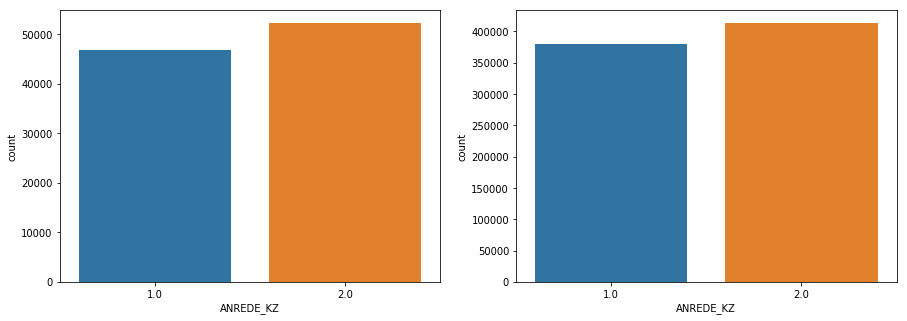

In [19]:
# Compare the distribution of values for at least five columns where there are
# no or few missing values, between the two subsets.
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
ax1 = sns.countplot(x="ANREDE_KZ", data=many_missing)
plt.subplot(1, 2, 2)
ax2 = sns.countplot(x="ANREDE_KZ", data=few_missing)

def comp_dist(var, dataA, dataB):
    plt.subplot(1, 2, 1)
    ax1 = sns.countplot(x=var, data=dataA)
    plt.subplot(1, 2, 2)
    ax2 = sns.countplot(x=var, data=dataB)
    

comp_dist("ANREDE_KZ", many_missing, few_missing)

#### Gender distribution does not appear to be markedly different between the two datasets. 

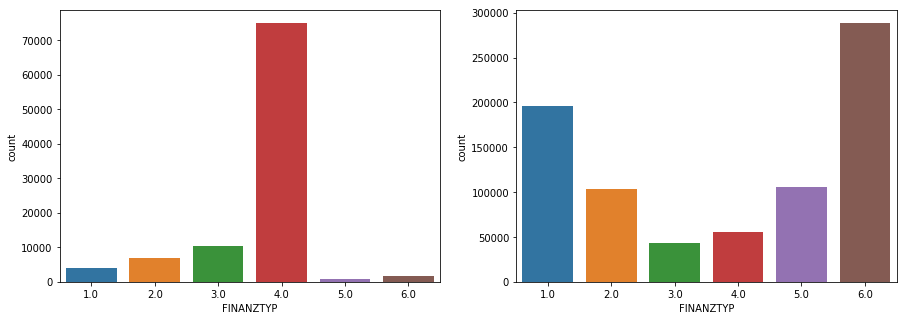

In [20]:
plt.figure(figsize=(15,5))
comp_dist("FINANZTYP", many_missing, few_missing)

#### FINANZTYP is definitely different between the datasets. Relative to the other levels, there are far more category 6 (inconspicous) types for the points with little missing information. The points missing more infomration have many more, relative to the other levels, type 4 types. 
Most descriptive financial type for individual
- -1: unknown
-  1: low financial interest (MINIMALIST)
-  2: money-saver (SPARER)
-  3: home ownership (HAUSBAUER)
-  4: be prepared (VORSORGER)
-  5: investor (ANLEGER)
-  6: inconspicuous (UNAUFFAELLIGER)

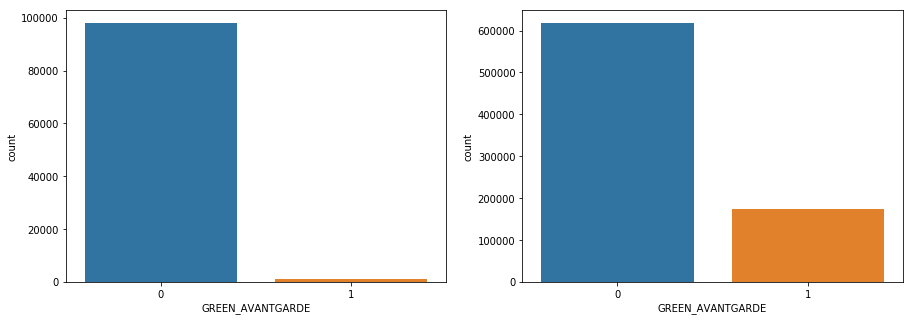

In [21]:
plt.figure(figsize=(15,5))
comp_dist("GREEN_AVANTGARDE", many_missing, few_missing)

#### The ratio of GREEN_AVANTGARDE types is slightly different. The many missing dataset has porportionally more people identifying as type 1 for Green avantgarde

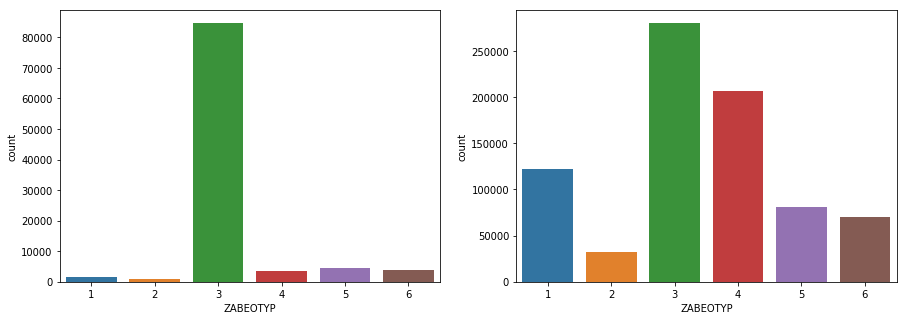

In [22]:
plt.figure(figsize=(15,5))
comp_dist("ZABEOTYP", many_missing, few_missing)

#### The relative counts of ZABEOTYP is different between the two groups especially when comparing levels 3 and 4 to the remaining levels. The distribution of levels in the dataset missing few observations for each datapoint is a bit more even across groups than are they for the dataset with many missing. 
Energy consumption typology
- -1: unknown
-  1: green
-  2: smart
-  3: fair supplied
-  4: price driven
-  5: seeking orientation
-  6: indifferent
-  9: unknown

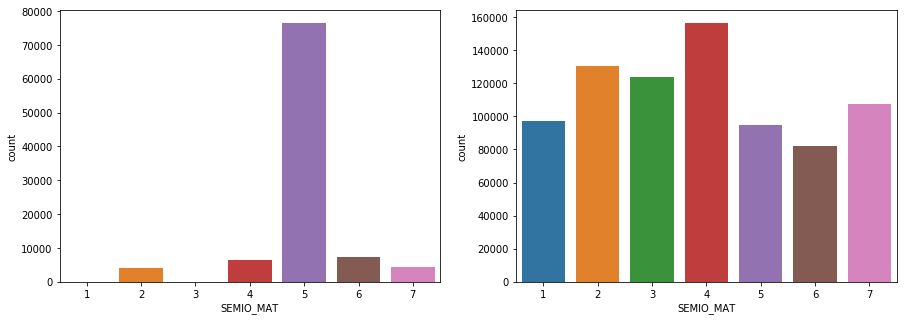

In [23]:
plt.figure(figsize=(15,5))
comp_dist("SEMIO_MAT", many_missing, few_missing)

#### The distribution of values across levels for Personality typology, Materialistic (SEMIO_MAT), is starkley different across groups. In the dataset with few missing there are MANY more levels 1,2, and 3 (representing high materialism) than there are in the dataset with many missing. This might definitely cause a problem if all of the missing points were removed because it will paint a different picture in terms of how the data could be clustered on materialism. For this particular case, identifying people who like to buy items (i.e. some level of materialism), this might cause a significant issue. 

Personality typology
- -1: unknown
-  1: highest affinity
-  2: very high affinity
-  3: high affinity
-  4: average affinity
-  5: low affinity
-  6: very low affinity
-  7: lowest affinity
-  9: unknown


#### Discussion 1.1.3: Assess Missing Data in Each Row

As the above figures indicate, the datasets are, in fact, different. This is particularly noticable when exploring the distribution of values within the SEMIO_MAT (materialism) variable. The implications of removing all of the missing data points may very well be that the distribution of values among the datapoints (people) becomes skewed such that the cluster is biased in one way or another. Really, we'd like to retain as much variability in the data as possible. This is worth exploring at a later point. However, we are limited because we must either remove missing values or impute them. Imputing values may not be the best option because there is really no way to know for sure what they may be especially for categorical or ordinal variables. For the purposes of this analysis we will use only the dataset with very few missing variables. 

### Step 1.2: Select and Re-Encode Features

 Check the third column of the feature summary (`feat_info`) for a summary of types of measurement.
- For numeric and interval data, these features can be kept without changes.
- Most of the variables in the dataset are ordinal in nature. While ordinal values may technically be non-linear in spacing the simplifying assumption was made that the ordinal variables can be treated as being interval in nature (that is, kept without any changes).
- Special handling is necessary for the remaining two variable types: categorical, and 'mixed'.



In [24]:
# How many features are there of each data type?
few_missing.columns

feat_info[feat_info.attribute.isin(few_missing.columns)].type.value_counts()

ordinal        49
categorical    18
mixed           6
numeric         6
Name: type, dtype: int64

49 ordinal that we can leave alone (treat as interval)  
18 categorical that need to be tended to  
6 mixed that need to be tended to  
6 numeric that we can leave alone until they get scaled in later steps  

#### Step 1.2.1: Re-Encode Categorical Features


- For binary (two-level) categoricals that take numeric values, keep them without doing anything.
- There is one binary variable that takes on non-numeric values. Re-encode the values as numbers or create a dummy variable.
- For multi-level categoricals (three or more values), drop some and dummy code remaining

In [11]:
# Assess categorical variables: which are binary, which are multi-level, and
# which one needs to be re-encoded?

#get just categorical variables
cat_vars = feat_info[feat_info.attribute.isin(few_missing.columns)].query('type == "categorical"').attribute.values
cat_vars

array(['ANREDE_KZ', 'CJT_GESAMTTYP', 'FINANZTYP', 'GFK_URLAUBERTYP',
       'GREEN_AVANTGARDE', 'LP_FAMILIE_FEIN', 'LP_FAMILIE_GROB',
       'LP_STATUS_FEIN', 'LP_STATUS_GROB', 'NATIONALITAET_KZ',
       'SHOPPER_TYP', 'SOHO_KZ', 'VERS_TYP', 'ZABEOTYP', 'GEBAEUDETYP',
       'OST_WEST_KZ', 'CAMEO_DEUG_2015', 'CAMEO_DEU_2015'], dtype=object)

In [26]:
# how many levels exist for each categorical variable 
for i in range(0, len(cat_vars)):
    var = cat_vars[i]
    print(few_missing[var].value_counts())

2.0    413088
1.0    379199
Name: ANREDE_KZ, dtype: int64
4.0    196762
3.0    146095
2.0    140765
5.0    110562
6.0    101053
1.0     92682
Name: CJT_GESAMTTYP, dtype: int64
6.0    288550
1.0    195593
5.0    105764
2.0    103866
4.0     55652
3.0     42862
Name: FINANZTYP, dtype: int64
12.0    128616
10.0    102367
8.0      82677
11.0     74638
5.0      70334
4.0      60383
9.0      56655
3.0      53062
1.0      50549
2.0      42465
7.0      40496
6.0      25677
Name: GFK_URLAUBERTYP, dtype: int64
0    618002
1    174285
Name: GREEN_AVANTGARDE, dtype: int64
1.0     399976
10.0    128403
2.0      97756
11.0     48595
8.0      21675
7.0      19406
4.0      11505
5.0      11128
9.0      10401
6.0       8333
3.0       4598
Name: LP_FAMILIE_FEIN, dtype: int64
1.0    399976
5.0    187399
2.0     97756
4.0     49414
3.0     27231
Name: LP_FAMILIE_GROB, dtype: int64
1.0     206219
9.0     134865
10.0    111059
2.0     110710
4.0      73792
3.0      68750
6.0      28679
5.0      27130
8.0   

In [12]:
# OST_WEST_KZ is a binary variable - re encode as numbers
#Building location via former East / West Germany (GDR / FRG)
#- -1: unknown
#-  O: East (GDR)
#-  W: West (FRG)

dict={'O': 0, 'W': 1}
few_missing['OST_WEST_KZ'] = few_missing['OST_WEST_KZ'].replace(dict)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [13]:
#test to make sure it worked
few_missing.OST_WEST_KZ.value_counts()

1    624737
0    167550
Name: OST_WEST_KZ, dtype: int64

In [29]:
# Decide which MULTI-LEVEL categorical variables to be kept in the analysis


#remove CAMEO_DEU_2015 (fine scale) but keep CAMEO_DEUG_2015 (rough scale version)
# remove  GFK_URLAUBERTYP - vacation habits - other variables may be more informative 
# remove LP_STATUS_FEIN in favor of more rough scale version
# remove LP_FAMILIE_FEIN- in favor of rough scale version
# removing NATIONALITAET_KZ (nationality based on how a name sounds) - personal reasons for thinking this is a silly variable,  nationality would be better


# reatin CAMEO_DEUG_2015 (rough scale version)
#retain GEBAEUDETYP (type of building - commercial vs residential)
# retain ZABEOTYP (energy consumption type) - linked to spending habits and 
# retain SHOPPER_TYP
# retain LP_STATUS_GROB (social status) - indicative of money and time spending habits
# retain CJT_GESAMTTYP - referred information and buying channels for consumer, very important here
# retain FINANZTYP - financial type - indicative of spending habits
# retain LP_FAMILIE_GROB - rough scale family type

In [14]:
# Drop certain multi level categorical variables
drop_vars = ['CAMEO_DEU_2015', 'GFK_URLAUBERTYP', 'LP_STATUS_FEIN', 'LP_FAMILIE_FEIN', 'NATIONALITAET_KZ']
red_fm = few_missing.drop(columns=drop_vars)

In [31]:
#check to see it worked 
red_fm.columns

Index(['ALTERSKATEGORIE_GROB', 'ANREDE_KZ', 'CJT_GESAMTTYP',
       'FINANZ_MINIMALIST', 'FINANZ_SPARER', 'FINANZ_VORSORGER',
       'FINANZ_ANLEGER', 'FINANZ_UNAUFFAELLIGER', 'FINANZ_HAUSBAUER',
       'FINANZTYP', 'GREEN_AVANTGARDE', 'HEALTH_TYP', 'LP_LEBENSPHASE_FEIN',
       'LP_LEBENSPHASE_GROB', 'LP_FAMILIE_GROB', 'LP_STATUS_GROB',
       'PRAEGENDE_JUGENDJAHRE', 'RETOURTYP_BK_S', 'SEMIO_SOZ', 'SEMIO_FAM',
       'SEMIO_REL', 'SEMIO_MAT', 'SEMIO_VERT', 'SEMIO_LUST', 'SEMIO_ERL',
       'SEMIO_KULT', 'SEMIO_RAT', 'SEMIO_KRIT', 'SEMIO_DOM', 'SEMIO_KAEM',
       'SEMIO_PFLICHT', 'SEMIO_TRADV', 'SHOPPER_TYP', 'SOHO_KZ', 'VERS_TYP',
       'ZABEOTYP', 'ANZ_PERSONEN', 'ANZ_TITEL', 'HH_EINKOMMEN_SCORE',
       'W_KEIT_KIND_HH', 'WOHNDAUER_2008', 'ANZ_HAUSHALTE_AKTIV',
       'ANZ_HH_TITEL', 'GEBAEUDETYP', 'KONSUMNAEHE', 'MIN_GEBAEUDEJAHR',
       'OST_WEST_KZ', 'WOHNLAGE', 'CAMEO_DEUG_2015', 'CAMEO_INTL_2015',
       'KBA05_ANTG1', 'KBA05_ANTG2', 'KBA05_ANTG3', 'KBA05_ANTG4', 'KBA05_GBZ

In [178]:
# Re-encode MULTI-LEVEL categorical variable(s) to be kept in the analysis.
# One-hot encoding of these variables
# reatin CAMEO_DEUG_2015 (rough scale version)
# retain EAST/WEST Germany (may indicate deep rooted spending habits based on family history and habits being in these different areas)
#retain GEBAEUDETYP (type of building - commercial vs residential)
# retain ZABEOTYP (energy consumption type) - linked to spending habits and 
# retain SHOPPER_TYP
# retain LP_STATUS_GROB (social status) - indicative of money and time spending habits
# retain CJT_GESAMTTYP - referred information and buying channels for consumer, very important here
# retain FINANZTYP - financial type - indicative of spending habits
# retain LP_FAMILIE_GROB - rough scale family type



In [15]:
# Use Get dummies amd drop the first one to prevent multicollinearity
#https://stackoverflow.com/questions/24109779/running-get-dummies-on-several-dataframe-columns
#pd.get_dummies(data=df, columns=['A', 'B'])
retain_multi_cat_vars = ['CAMEO_DEUG_2015', 'GEBAEUDETYP', 'ZABEOTYP','SHOPPER_TYP', 'LP_STATUS_GROB', 'CJT_GESAMTTYP','FINANZTYP', 'LP_FAMILIE_GROB']
red_fm_encode = pd.get_dummies(data=red_fm, columns = retain_multi_cat_vars,prefix_sep='_', drop_first=True)

red_fm_encode.head(5)


,ALTERSKATEGORIE_GROB,ANREDE_KZ,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,GREEN_AVANTGARDE,HEALTH_TYP,...,CJT_GESAMTTYP_6.0,FINANZTYP_2.0,FINANZTYP_3.0,FINANZTYP_4.0,FINANZTYP_5.0,FINANZTYP_6.0,LP_FAMILIE_GROB_2.0,LP_FAMILIE_GROB_3.0,LP_FAMILIE_GROB_4.0,LP_FAMILIE_GROB_5.0
1,1.0,2.0,1.0,5.0,2.0,5.0,4.0,5.0,0,3.0,...,0,0,0,0,0,0,0,1,0,0
2,3.0,2.0,1.0,4.0,1.0,2.0,3.0,5.0,1,3.0,...,0,0,0,0,0,0,0,0,0,0
3,4.0,2.0,4.0,2.0,5.0,2.0,1.0,2.0,0,2.0,...,0,0,0,0,0,1,0,0,0,0
4,3.0,1.0,4.0,3.0,4.0,1.0,3.0,2.0,0,3.0,...,0,0,0,0,1,0,0,0,0,1
5,1.0,2.0,3.0,1.0,5.0,2.0,2.0,5.0,0,3.0,...,0,1,0,0,0,0,0,0,0,0


In [33]:
red_fm_encode.columns[1:100]

Index(['ANREDE_KZ', 'FINANZ_MINIMALIST', 'FINANZ_SPARER', 'FINANZ_VORSORGER',
       'FINANZ_ANLEGER', 'FINANZ_UNAUFFAELLIGER', 'FINANZ_HAUSBAUER',
       'GREEN_AVANTGARDE', 'HEALTH_TYP', 'LP_LEBENSPHASE_FEIN',
       'LP_LEBENSPHASE_GROB', 'PRAEGENDE_JUGENDJAHRE', 'RETOURTYP_BK_S',
       'SEMIO_SOZ', 'SEMIO_FAM', 'SEMIO_REL', 'SEMIO_MAT', 'SEMIO_VERT',
       'SEMIO_LUST', 'SEMIO_ERL', 'SEMIO_KULT', 'SEMIO_RAT', 'SEMIO_KRIT',
       'SEMIO_DOM', 'SEMIO_KAEM', 'SEMIO_PFLICHT', 'SEMIO_TRADV', 'SOHO_KZ',
       'VERS_TYP', 'ANZ_PERSONEN', 'ANZ_TITEL', 'HH_EINKOMMEN_SCORE',
       'W_KEIT_KIND_HH', 'WOHNDAUER_2008', 'ANZ_HAUSHALTE_AKTIV',
       'ANZ_HH_TITEL', 'KONSUMNAEHE', 'MIN_GEBAEUDEJAHR', 'OST_WEST_KZ',
       'WOHNLAGE', 'CAMEO_INTL_2015', 'KBA05_ANTG1', 'KBA05_ANTG2',
       'KBA05_ANTG3', 'KBA05_ANTG4', 'KBA05_GBZ', 'BALLRAUM', 'EWDICHTE',
       'INNENSTADT', 'GEBAEUDETYP_RASTER', 'KKK', 'MOBI_REGIO',
       'ONLINE_AFFINITAET', 'REGIOTYP', 'KBA13_ANZAHL_PKW', 'PLZ8_ANTG1',
 

In [34]:
#test the shape
red_fm_encode.shape

(792287, 106)

#### Discussion 1.2.1: Re-Encode Categorical Features

I chose to remove these variables:
> CAMEO_DEU_2015 (fine scale) but keep CAMEO_DEUG_2015 (rough scale version)  
> GFK_URLAUBERTYP - vacation habits - other variables may be more informative   
> LP_STATUS_FEIN in favor of more rough scale version  
> LP_FAMILIE_FEIN- in favor of rough scale version  
> NATIONALITAET_KZ (nationality based on how a name sounds) - personal reasons for thinking this is a silly variable,  nationality would be better  

I chose to retain these variables:
>CAMEO_DEUG_2015 (rough scale version)  
> GEBAEUDETYP (type of building - commercial vs residential)  
>ZABEOTYP (energy consumption type) - linked to spending habits .  
>SHOPPER_TYP  - if they are going to shop- we need to keep this one
>LP_STATUS_GROB (social status) - indicative of money and time spending habits  
>CJT_GESAMTTYP - referred information and buying channels for consumer, very important here  
>FINANZTYP - financial type - indicative of spending habits  
>LP_FAMILIE_GROB - rough scale family type  

I applied pandas get dummies function to one-hot encode the retained categorical variables. I dropped the first instance of each to prevent multi collinearity. 

#### Step 1.2.2: Engineer Mixed-Type Features

There are a handful of features that are marked as "mixed" in the feature summary that require special treatment in order to be included in the analysis. Two in particular deserve attention.

- "PRAEGENDE_JUGENDJAHRE" combines information on three dimensions: generation by decade, movement (mainstream vs. avantgarde), and nation (east vs. west). Create two new variables to capture the other two dimensions: an interval-type variable for decade, and a binary variable for movement.
- "CAMEO_INTL_2015" combines information on two axes: wealth and life stage. Break up the two-digit codes by their 'tens'-place and 'ones'-place digits into two new ordinal variables.


In [16]:
mix_vars = feat_info[feat_info.attribute.isin(red_fm_encode.columns)].query('type == "mixed"').attribute.values
mix_vars

array(['LP_LEBENSPHASE_FEIN', 'LP_LEBENSPHASE_GROB',
       'PRAEGENDE_JUGENDJAHRE', 'WOHNLAGE', 'CAMEO_INTL_2015',
       'PLZ8_BAUMAX'], dtype=object)

In [17]:
# Investigate "PRAEGENDE_JUGENDJAHRE" and engineer two new variables.
red_fm_encode.PRAEGENDE_JUGENDJAHRE


#1: 40s - war years (Mainstream, E+W)
#-  2: 40s - reconstruction years (Avantgarde, E+W)
#-  3: 50s - economic miracle (Mainstream, E+W)
#-  4: 50s - milk bar / Individualisation (Avantgarde, E+W)
#-  5: 60s - economic miracle (Mainstream, E+W)
#-  6: 60s - generation 68 / student protestors (Avantgarde, W)
#-  7: 60s - opponents to the building of the Wall (Avantgarde, E)
#-  8: 70s - family orientation (Mainstream, E+W)
#-  9: 70s - peace movement (Avantgarde, E+W)
#- 10: 80s - Generation Golf (Mainstream, W)
#- 11: 80s - ecological awareness (Avantgarde, W)
#- 12: 80s - FDJ / communist party youth organisation (Mainstream, E)
#- 13: 80s - Swords into ploughshares (Avantgarde, E)
#- 14: 90s - digital media kids (Mainstream, E+W)
#- 15: 90s - ecological awareness (Avantgarde, E+W)


red_fm_encode['DECADE'] =1

red_fm_encode['DECADE'] = np.where(red_fm_encode.PRAEGENDE_JUGENDJAHRE.isin([1.0,2.0]), 40, red_fm_encode['DECADE'] )
red_fm_encode['DECADE'] = np.where(red_fm_encode.PRAEGENDE_JUGENDJAHRE.isin([3.0,4.0]), 50,red_fm_encode['DECADE'] )
red_fm_encode['DECADE'] = np.where(red_fm_encode.PRAEGENDE_JUGENDJAHRE.isin([5.0,6.0, 7.0]), 60,red_fm_encode['DECADE'] )
red_fm_encode['DECADE'] = np.where(red_fm_encode.PRAEGENDE_JUGENDJAHRE.isin([8.0,9.0]), 70,red_fm_encode['DECADE'] )
red_fm_encode['DECADE'] = np.where(red_fm_encode.PRAEGENDE_JUGENDJAHRE.isin([10.0,11.0, 12.0, 13.0]), 80,red_fm_encode['DECADE'] )
red_fm_encode['DECADE']= np.where(red_fm_encode.PRAEGENDE_JUGENDJAHRE.isin([14.0,15.0]), 90,red_fm_encode['DECADE'])
#deal with any missing values of PRAEGENDE_JUGENDJAHRE
red_fm_encode['DECADE']= np.where(red_fm_encode.PRAEGENDE_JUGENDJAHRE.isna(), np.NaN,red_fm_encode['DECADE'])


#1 for mainstream, 0 for avantgarde
red_fm_encode['MOVEMENT'] = 0
red_fm_encode['MOVEMENT'] = np.where(red_fm_encode.PRAEGENDE_JUGENDJAHRE.isin([1.0,2.0,5.0,8.0,10.0,12.0,14.0]), 1,red_fm_encode['MOVEMENT'])
#deal with any missing values of PRAEGENDE_JUGENDJAHRE
red_fm_encode['MOVEMENT']= np.where(red_fm_encode.PRAEGENDE_JUGENDJAHRE.isna(), np.NaN, red_fm_encode['MOVEMENT'])


In [37]:
#test to make sure it worked
red_fm_encode.PRAEGENDE_JUGENDJAHRE.value_counts(), red_fm_encode.DECADE.value_counts(), red_fm_encode.MOVEMENT.value_counts()

(14.0    181525
 8.0     140681
 10.0     85276
 5.0      84400
 3.0      53615
 15.0     42078
 11.0     35448
 9.0      33515
 6.0      25629
 12.0     24340
 1.0      20550
 4.0      20431
 2.0       7470
 13.0      5714
 7.0       4000
 Name: PRAEGENDE_JUGENDJAHRE, dtype: int64, 90.0    223603
 70.0    174196
 80.0    150778
 60.0    114029
 50.0     74046
 40.0     28020
 Name: DECADE, dtype: int64, 1.0    544242
 0.0    220430
 Name: MOVEMENT, dtype: int64)

In [18]:
#drop the PRAEGENDE_JUGENDJAHRE column
red_fm_encode.drop(columns='PRAEGENDE_JUGENDJAHRE', inplace=True)

In [19]:
# Investigate "CAMEO_INTL_2015" and engineer two new variables.
#red_fm_encode.CAMEO_INTL_2015
    
red_fm_encode['WEALTH'] = red_fm_encode.CAMEO_INTL_2015.str[0]
red_fm_encode['LIFESTAGE'] = red_fm_encode.CAMEO_INTL_2015.str[1]

In [20]:
#drop the CAMEO_INTL_2015 column
red_fm_encode = red_fm_encode.drop(columns='CAMEO_INTL_2015')

In [93]:
#explore other mixed types
#LP_LEBENSPHASE_FEIN', 'LP_LEBENSPHASE_GROB',
#       'PRAEGENDE_JUGENDJAHRE', 'WOHNLAGE', 'CAMEO_INTL_2015',
#       'PLZ8_BAUMAX'

#LP_LEBENSPHASE_FEIN- remove this one because its a really fine life stage variable that may be accounted for in wealth and lifestage
#LP_LEBENSPHASE_GROB - remove this one again because it is addressed by wealth and lifestage
#WOHNLAGE - remove neighborhood quality
#PLZ8_BAUMAX - remove most common building type within a certain region seems extremely specific 

In [21]:
remove_remaining_mixed=['LP_LEBENSPHASE_FEIN', 'LP_LEBENSPHASE_GROB', 'WOHNLAGE', 'PLZ8_BAUMAX']
red_fm_encode = red_fm_encode.drop(columns=remove_remaining_mixed)
general_data = red_fm_encode.copy()

#### Discussion 1.2.2: Engineer Mixed-Type Features

Mixed type variables were treated as follows:

Of the 6 mixed type variables 4 were removed 2 were used to engineer new features.
Removed variables included:  
**LP_LEBENSPHASE_FEIN**- remove this one because its a really fine life stage variable that may be accounted for in wealth and lifestage  
**LP_LEBENSPHASE_GROB** - remove this one again because it is addressed by wealth and lifestage  
**WOHNLAGE** - remove neighborhood quality  
**PLZ8_BAUMAX** - remove most common building type within a certain region seems extremely specific  

**PRAEGENDE_JUGENDJAHRE** and **CAMEO_INTL_2015** were used to engineer two new features; decade and movement, and wealth and lifestage, respectively. These two variables were then dropped from the dataset to prevent multicollinearity. 


#### Step 1.2.3: Complete Feature Selection

Make sure the data frame now only has the columns to keep. To summarize, the dataframe should consist of the following:
- All numeric, interval, and ordinal type columns from the original dataset.
- Binary categorical features (all numerically-encoded).
- Engineered features from other multi-level categorical features and mixed features.


In [42]:

general_data.isna().sum(axis=1).describe()


count    792287.000000
mean          0.850511
std           2.196731
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          15.000000
dtype: float64

In [43]:

#check to see that there aren't many missing values
general_data.isna().sum(axis=1).describe()
general_data.isna().sum(axis=0)



ALTERSKATEGORIE_GROB      2740
ANREDE_KZ                    0
FINANZ_MINIMALIST            0
FINANZ_SPARER                0
FINANZ_VORSORGER             0
FINANZ_ANLEGER               0
FINANZ_UNAUFFAELLIGER        0
FINANZ_HAUSBAUER             0
GREEN_AVANTGARDE             0
HEALTH_TYP               35855
RETOURTYP_BK_S            4368
SEMIO_SOZ                    0
SEMIO_FAM                    0
SEMIO_REL                    0
SEMIO_MAT                    0
SEMIO_VERT                   0
SEMIO_LUST                   0
SEMIO_ERL                    0
SEMIO_KULT                   0
SEMIO_RAT                    0
SEMIO_KRIT                   0
SEMIO_DOM                    0
SEMIO_KAEM                   0
SEMIO_PFLICHT                0
SEMIO_TRADV                  0
SOHO_KZ                      0
VERS_TYP                 35855
ANZ_PERSONEN                 0
ANZ_TITEL                    0
HH_EINKOMMEN_SCORE           0
                         ...  
ZABEOTYP_2                   0
ZABEOTYP

In [44]:
#check the shapes to make sure the progression of variable dropping makes sense
general_data.shape, red_fm.shape, few_missing.shape, many_missing.shape, az_red.shape

((792287, 104), (792287, 74), (792287, 79), (98934, 79), (891221, 79))

In [45]:
general_data.columns[1:100]

Index(['ANREDE_KZ', 'FINANZ_MINIMALIST', 'FINANZ_SPARER', 'FINANZ_VORSORGER',
       'FINANZ_ANLEGER', 'FINANZ_UNAUFFAELLIGER', 'FINANZ_HAUSBAUER',
       'GREEN_AVANTGARDE', 'HEALTH_TYP', 'RETOURTYP_BK_S', 'SEMIO_SOZ',
       'SEMIO_FAM', 'SEMIO_REL', 'SEMIO_MAT', 'SEMIO_VERT', 'SEMIO_LUST',
       'SEMIO_ERL', 'SEMIO_KULT', 'SEMIO_RAT', 'SEMIO_KRIT', 'SEMIO_DOM',
       'SEMIO_KAEM', 'SEMIO_PFLICHT', 'SEMIO_TRADV', 'SOHO_KZ', 'VERS_TYP',
       'ANZ_PERSONEN', 'ANZ_TITEL', 'HH_EINKOMMEN_SCORE', 'W_KEIT_KIND_HH',
       'WOHNDAUER_2008', 'ANZ_HAUSHALTE_AKTIV', 'ANZ_HH_TITEL', 'KONSUMNAEHE',
       'MIN_GEBAEUDEJAHR', 'OST_WEST_KZ', 'KBA05_ANTG1', 'KBA05_ANTG2',
       'KBA05_ANTG3', 'KBA05_ANTG4', 'KBA05_GBZ', 'BALLRAUM', 'EWDICHTE',
       'INNENSTADT', 'GEBAEUDETYP_RASTER', 'KKK', 'MOBI_REGIO',
       'ONLINE_AFFINITAET', 'REGIOTYP', 'KBA13_ANZAHL_PKW', 'PLZ8_ANTG1',
       'PLZ8_ANTG2', 'PLZ8_ANTG3', 'PLZ8_ANTG4', 'PLZ8_HHZ', 'PLZ8_GBZ',
       'ARBEIT', 'ORTSGR_KLS9', 'RELAT_AB', 

In [46]:
#check dropped variables
general_data.columns.difference(az_red.columns)

Index(['CAMEO_DEUG_2015_2', 'CAMEO_DEUG_2015_3', 'CAMEO_DEUG_2015_4',
       'CAMEO_DEUG_2015_5', 'CAMEO_DEUG_2015_6', 'CAMEO_DEUG_2015_7',
       'CAMEO_DEUG_2015_8', 'CAMEO_DEUG_2015_9', 'CJT_GESAMTTYP_2.0',
       'CJT_GESAMTTYP_3.0', 'CJT_GESAMTTYP_4.0', 'CJT_GESAMTTYP_5.0',
       'CJT_GESAMTTYP_6.0', 'DECADE', 'FINANZTYP_2.0', 'FINANZTYP_3.0',
       'FINANZTYP_4.0', 'FINANZTYP_5.0', 'FINANZTYP_6.0', 'GEBAEUDETYP_2.0',
       'GEBAEUDETYP_3.0', 'GEBAEUDETYP_4.0', 'GEBAEUDETYP_5.0',
       'GEBAEUDETYP_6.0', 'GEBAEUDETYP_8.0', 'LIFESTAGE',
       'LP_FAMILIE_GROB_2.0', 'LP_FAMILIE_GROB_3.0', 'LP_FAMILIE_GROB_4.0',
       'LP_FAMILIE_GROB_5.0', 'LP_STATUS_GROB_2.0', 'LP_STATUS_GROB_3.0',
       'LP_STATUS_GROB_4.0', 'LP_STATUS_GROB_5.0', 'MOVEMENT',
       'SHOPPER_TYP_1.0', 'SHOPPER_TYP_2.0', 'SHOPPER_TYP_3.0', 'WEALTH',
       'ZABEOTYP_2', 'ZABEOTYP_3', 'ZABEOTYP_4', 'ZABEOTYP_5', 'ZABEOTYP_6'],
      dtype='object')

In [47]:
#look at all column names in the original dataset that are not remaining in the final dataset
#should make sense based on order of operations above and the variable encoding step
azdias_replaced.columns.difference(general_data.columns)

Index(['AGER_TYP', 'ALTER_HH', 'CAMEO_DEUG_2015', 'CAMEO_DEU_2015',
       'CAMEO_INTL_2015', 'CJT_GESAMTTYP', 'FINANZTYP', 'GEBAEUDETYP',
       'GEBURTSJAHR', 'GFK_URLAUBERTYP', 'KBA05_BAUMAX', 'KK_KUNDENTYP',
       'LP_FAMILIE_FEIN', 'LP_FAMILIE_GROB', 'LP_LEBENSPHASE_FEIN',
       'LP_LEBENSPHASE_GROB', 'LP_STATUS_FEIN', 'LP_STATUS_GROB',
       'NATIONALITAET_KZ', 'PLZ8_BAUMAX', 'PRAEGENDE_JUGENDJAHRE',
       'SHOPPER_TYP', 'TITEL_KZ', 'WOHNLAGE', 'ZABEOTYP'],
      dtype='object')

### Step 1.3: Create a Cleaning Function

Creat a cleaning function that executes the main feature selection, encoding, and re-engineering steps  performed above. Run this function on customer data in following steps.

In [48]:
def clean_data(df):
    """
    Perform feature trimming, re-encoding, and engineering for demographics
    data
    
    INPUT: Demographics DataFrame
    OUTPUT: Trimmed and cleaned demographics DataFrame
    """
    
    # Put in code here to execute all main cleaning steps:
    # convert missing value codes into NaNs, ...
    #use dictionary for coded missing value to convert to NaNs
    dict0 = {-1:np.NaN, 0:np.NaN}
    dict1 = {-1:np.NaN, 0:np.NaN, 9:np.NaN}
    dict2 = {0:np.NaN}
    dict3 = {-1:np.NaN}
    dict4 = { -1:np.NaN, 9:np.NaN}
    dict5 = { -1:np.NaN, 'X':np.NaN}
    dict6 = { 'XX':np.NaN}
    dict7 = { -1:np.NaN, 'XX':np.NaN}

    dicts = [dict0, dict1, dict2, dict3, dict4, dict5, dict6, dict7]
    
    #loop through each missing value code and replace with the equivalent dictionary position
    unique_code_miss = feat_info.missing_or_unknown.unique()
    unique_code_miss= np.delete(unique_code_miss,4)
    
    df_replaced= df.copy()
    for i in range(0, len(unique_code_miss)):
        #get variables for each unique missing code
        d = list(feat_info[feat_info['missing_or_unknown'] == unique_code_miss[i]].attribute.values)
        #select these variables and replace the coded values with NAN using the defined dictionaries
        df_replaced[d] = df[d].replace(dicts[i])

    # remove selected columns and rows, ...
    # remove columns with very high number of missing values
    df_red = df_replaced.drop(columns=['TITEL_KZ','AGER_TYP','KK_KUNDENTYP','KBA05_BAUMAX','GEBURTSJAHR','ALTER_HH'])
    
    #select the dataset with very few missing rows
    missing_by_row = pd.DataFrame(df_red.isna().sum(axis=1), columns=['missingcnt'])
    few_missing = df_red.iloc[missing_by_row.query('missingcnt <=15').index]
    
    
    #drop some categorical columns
    drop_vars = ['CAMEO_DEU_2015', 'GFK_URLAUBERTYP', 'LP_STATUS_FEIN', 'LP_FAMILIE_FEIN', 'NATIONALITAET_KZ']
    red_fm = few_missing.drop(columns=drop_vars)

    # select, re-encode, and engineer column values.
        #re-encode OST_WEST
    dict={'O': 0, 'W': 1}
    red_fm['OST_WEST_KZ'] = red_fm['OST_WEST_KZ'].replace(dict)
    
        #re-encode multilevel categorical variables
    retain_multi_cat_vars = ['CAMEO_DEUG_2015', 'GEBAEUDETYP', 'ZABEOTYP','SHOPPER_TYP', 'LP_STATUS_GROB', 'CJT_GESAMTTYP','FINANZTYP', 'LP_FAMILIE_GROB']
    red_fm_encode = pd.get_dummies(data=red_fm, columns = retain_multi_cat_vars,prefix_sep='_', drop_first=True)
    
    #engineer some variables
    red_fm_encode['DECADE'] =1

    red_fm_encode['DECADE'] = np.where(red_fm_encode.PRAEGENDE_JUGENDJAHRE.isin([1.0,2.0]), 40, red_fm_encode['DECADE'] )
    red_fm_encode['DECADE'] = np.where(red_fm_encode.PRAEGENDE_JUGENDJAHRE.isin([3.0,4.0]), 50,red_fm_encode['DECADE'] )
    red_fm_encode['DECADE'] = np.where(red_fm_encode.PRAEGENDE_JUGENDJAHRE.isin([5.0,6.0, 7.0]), 60,red_fm_encode['DECADE'] )
    red_fm_encode['DECADE'] = np.where(red_fm_encode.PRAEGENDE_JUGENDJAHRE.isin([8.0,9.0]), 70,red_fm_encode['DECADE'] )
    red_fm_encode['DECADE'] = np.where(red_fm_encode.PRAEGENDE_JUGENDJAHRE.isin([10.0,11.0, 12.0, 13.0]), 80,red_fm_encode['DECADE'] )
    red_fm_encode['DECADE']= np.where(red_fm_encode.PRAEGENDE_JUGENDJAHRE.isin([14.0,15.0]), 90,red_fm_encode['DECADE'])
    #deal with any missing values of PRAEGENDE_JUGENDJAHRE
    red_fm_encode['DECADE']= np.where(red_fm_encode.PRAEGENDE_JUGENDJAHRE.isna(), np.NaN,red_fm_encode['DECADE'])

    #1 for mainstream, 0 for avantgarde
    red_fm_encode['MOVEMENT'] = 0
    red_fm_encode['MOVEMENT'] = np.where(red_fm_encode.PRAEGENDE_JUGENDJAHRE.isin([1.0,2.0,5.0,8.0,10.0,12.0,14.0]), 1,red_fm_encode['MOVEMENT'])
    #deal with any missing values of PRAEGENDE_JUGENDJAHRE
    red_fm_encode['MOVEMENT']= np.where(red_fm_encode.PRAEGENDE_JUGENDJAHRE.isna(), np.NaN, red_fm_encode['MOVEMENT'])

    red_fm_encode['WEALTH'] = red_fm_encode.CAMEO_INTL_2015.str[0]
    red_fm_encode['LIFESTAGE'] = red_fm_encode.CAMEO_INTL_2015.str[1]

    remove_remaining_mixed=['CAMEO_INTL_2015', 'PRAEGENDE_JUGENDJAHRE', 'LP_LEBENSPHASE_FEIN', 'LP_LEBENSPHASE_GROB', 'WOHNLAGE', 'PLZ8_BAUMAX']
    red_fm_encode = red_fm_encode.drop(columns=remove_remaining_mixed)

    # Return the cleaned dataframe.
    return red_fm_encode
    

## Step 2: Feature Transformation

### Step 2.1: Apply Feature Scaling

Perform feature scaling so that the principal component vectors are not influenced by the natural differences in scale for features. Make sure to remove any remaining NA values.




In [22]:

general_data.isna().sum(axis=0)
#remove rows with na values
general_data.dropna(axis='rows', inplace=True)


In [51]:
general_data.shape

(623211, 104)

In [50]:
#test to make sure it worked
general_data.isna().sum(axis=0)

ALTERSKATEGORIE_GROB     0
ANREDE_KZ                0
FINANZ_MINIMALIST        0
FINANZ_SPARER            0
FINANZ_VORSORGER         0
FINANZ_ANLEGER           0
FINANZ_UNAUFFAELLIGER    0
FINANZ_HAUSBAUER         0
GREEN_AVANTGARDE         0
HEALTH_TYP               0
RETOURTYP_BK_S           0
SEMIO_SOZ                0
SEMIO_FAM                0
SEMIO_REL                0
SEMIO_MAT                0
SEMIO_VERT               0
SEMIO_LUST               0
SEMIO_ERL                0
SEMIO_KULT               0
SEMIO_RAT                0
SEMIO_KRIT               0
SEMIO_DOM                0
SEMIO_KAEM               0
SEMIO_PFLICHT            0
SEMIO_TRADV              0
SOHO_KZ                  0
VERS_TYP                 0
ANZ_PERSONEN             0
ANZ_TITEL                0
HH_EINKOMMEN_SCORE       0
                        ..
ZABEOTYP_2               0
ZABEOTYP_3               0
ZABEOTYP_4               0
ZABEOTYP_5               0
ZABEOTYP_6               0
SHOPPER_TYP_1.0          0
S

In [23]:
# Apply feature scaling to the general population demographics data.
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
sc_fitted=sc.fit(general_data)
scaled_general_data = sc_fitted.transform(general_data)

### Discussion 2.1: Apply Feature Scaling

Here, I removed the remaining rows that had any missing feature and applied a StandardScaler to transform the data to mean 0 and unit variance. 

### Step 2.2: Perform Dimensionality Reduction

Apply dimensionality reduction techniques.

- Use sklearn's [PCA](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) class to apply principal component analysis on the data, thus finding the vectors of maximal variance in the data. 
- Do not sent any paramters or set to components that is half number of features 
- Select a value for the number of transformed features to retain for the clustering part of the project.
- Re-fit a PCA instance to perform the decided-on transformation (n components)

In [24]:
# Apply PCA to the data.
#instantiate a PCA object
from sklearn.decomposition import PCA

#fit pca model to the scaled data
pca=PCA(n_components = 60) #just more than half of the features in the dataset
pca_fitted = pca.fit(scaled_general_data)



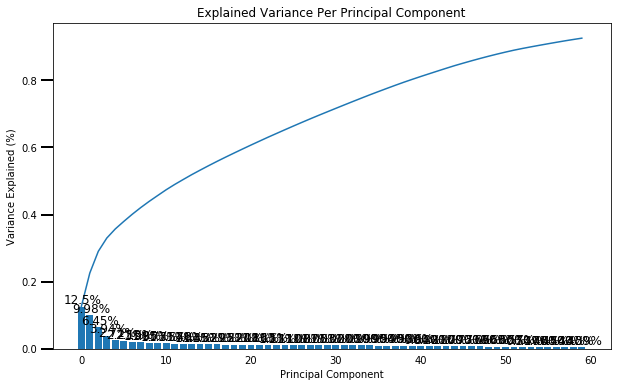

In [25]:
# Investigate the variance accounted for by each principal component.
#use scree_plot function borrowed from Udacity course
def scree_plot(pca):
    '''
    Creates a scree plot associated with the principal components 
    
    INPUT: pca - the result of instantian of PCA in scikit learn
            
    OUTPUT:
            None
    '''
    num_components = len(pca.explained_variance_ratio_)
    ind = np.arange(num_components)
    vals = pca.explained_variance_ratio_
 
    plt.figure(figsize=(10, 6))
    ax = plt.subplot(111)
    cumvals = np.cumsum(vals)
    ax.bar(ind, vals)
    ax.plot(ind, cumvals)
    for i in range(num_components):
        ax.annotate(r"%s%%" % ((str(vals[i]*100)[:4])), (ind[i]+0.2, vals[i]), va="bottom", ha="center", fontsize=12)
 
    ax.xaxis.set_tick_params(width=0)
    ax.yaxis.set_tick_params(width=2, length=12)
 
    ax.set_xlabel("Principal Component")
    ax.set_ylabel("Variance Explained (%)")
    plt.title('Explained Variance Per Principal Component')

    
scree_plot(pca_fitted)

In [26]:
# Re-apply PCA to the data while selecting for number of components to retain.
#RETAIN 40 components which describe more than 80% of the variability in the dataset
n_components=40
pca=PCA(n_components) 
#apply pca to scaled data
pca_fitted = pca.fit(scaled_general_data)
general_pop_pcatrans = pca_fitted.transform(scaled_general_data)


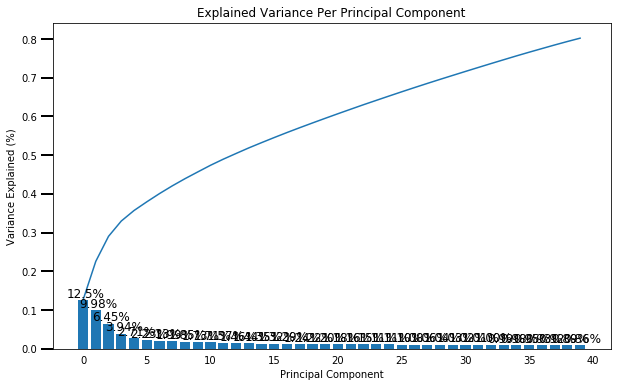

In [56]:
scree_plot(pca_fitted)

### Discussion 2.2: Perform Dimensionality Reduction
Fourty components are able to describe just about 80% of the variation in the dataset. Each additional component describes less than 2% of the total variation and each additional component is responsible for less as less. The overall addition of more components is able to explain more variation but, for the sake of computing, fourty components will be selected for the forthcoming analysis. 

### Step 2.3: Interpret Principal Components

Check out the weight of each variable on the first few components to see if they can be interpreted in some fashion.

As a reminder, each principal component is a unit vector that points in the direction of highest variance (after accounting for the variance captured by earlier principal components). The further a weight is from zero, the more the principal component is in the direction of the corresponding feature. If two features have large weights of the same sign (both positive or both negative), then increases in one tend expect to be associated with increases in the other. To contrast, features with different signs can be expected to show a negative correlation: increases in one variable should result in a decrease in the other.

- Investigate the features by mapping each weight to their corresponding feature name, then sort the features according to weight. The most interesting features for each principal component, then, will be those at the beginning and end of the sorted list. Use the data dictionary document to help you understand these most prominent features, their relationships, and what a positive or negative value on the principal component might indicate.


In [27]:
# Map weights for the first principal component to corresponding feature names
# and then print the linked values, sorted by weight.


#work with the components_ attribute of the pca object. Looking at the shape of components shows us that each component gives the weights for each feature
pca_fitted.components_.shape
comps=pca_fitted.components_
comps

array([[-0.15225452, -0.00733294, -0.21393606, ...,  0.11290847,
         0.18310837, -0.1207158 ],
       [ 0.21394056,  0.06288725,  0.02457281, ..., -0.01637522,
         0.10955731, -0.02994166],
       [ 0.05217662, -0.36069123,  0.14602607, ..., -0.06716509,
         0.01575719, -0.00900184],
       ..., 
       [-0.0317946 , -0.00557074,  0.05980345, ...,  0.01477914,
        -0.03679798,  0.06627977],
       [ 0.09635397, -0.0230986 ,  0.03069454, ..., -0.03004237,
        -0.13897412,  0.14578352],
       [ 0.05203728, -0.02090536, -0.04436655, ...,  0.05084496,
        -0.11429956,  0.05892379]])

In [58]:
#make feature weights matrix
x = np.arange(1, n_components+1, 1) #set index names
feat_weights = pd.DataFrame(comps, columns = red_fm_encode.columns).set_index(x)

In [59]:
feat_weights

,ALTERSKATEGORIE_GROB,ANREDE_KZ,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,GREEN_AVANTGARDE,HEALTH_TYP,...,FINANZTYP_5.0,FINANZTYP_6.0,LP_FAMILIE_GROB_2.0,LP_FAMILIE_GROB_3.0,LP_FAMILIE_GROB_4.0,LP_FAMILIE_GROB_5.0,DECADE,MOVEMENT,WEALTH,LIFESTAGE
1,-0.152255,-0.007333,-0.213936,0.171505,-0.143560,0.097468,0.103909,0.127077,-0.107708,0.041157,...,-0.012082,-0.040243,-0.036100,0.017811,-0.010072,-0.055540,0.137226,0.112909,0.183108,-0.120716
2,0.213941,0.062887,0.024573,-0.193635,0.195931,-0.180983,-0.201040,0.136217,-0.036107,-0.043671,...,0.092876,0.057376,0.032390,-0.036641,-0.065965,-0.053553,-0.217915,-0.016375,0.109557,-0.029942
3,0.052177,-0.360691,0.146027,-0.078451,0.075849,-0.170292,-0.065862,-0.056466,0.060632,-0.007202,...,0.145866,-0.003220,0.030207,-0.054168,-0.020869,-0.000951,-0.082361,-0.067164,0.015757,-0.009002
4,-0.036230,0.064495,0.028292,0.002417,-0.019749,-0.111856,0.094876,-0.060279,0.350161,-0.014947,...,0.130758,-0.137717,0.004644,0.003878,0.046085,0.081260,0.032683,-0.290865,-0.115857,0.052800
5,0.036500,-0.023428,0.112444,-0.002035,-0.035780,0.059587,-0.099152,-0.145210,0.011338,0.053139,...,-0.113816,0.222040,-0.028696,0.027495,0.116817,0.212666,0.036258,0.006086,0.039340,-0.023598
6,0.010813,0.012627,-0.042030,0.015733,-0.031990,0.047499,-0.042183,0.045368,-0.030042,-0.024799,...,-0.074071,0.085850,-0.036371,-0.004360,0.008999,0.061536,0.014096,0.025745,-0.056450,0.009290
7,0.062359,-0.052890,0.008179,0.019179,0.055887,0.013273,0.007497,-0.088142,-0.067413,0.101719,...,-0.014168,0.016507,-0.077817,0.040815,0.124300,0.195153,0.034225,0.078700,0.077468,-0.105819
8,-0.063287,-0.031263,0.163442,-0.061691,0.055611,-0.081526,-0.112967,-0.237968,-0.043513,0.299333,...,0.004779,0.198047,0.027615,-0.018044,-0.002378,-0.226171,-0.009822,0.079588,-0.058336,-0.061757
9,0.016596,-0.011416,-0.042719,0.074523,-0.049455,0.008870,0.216073,-0.010592,0.003953,-0.031846,...,-0.026653,-0.323173,0.030797,-0.027433,-0.043527,-0.126490,0.040937,-0.009732,-0.056937,-0.030891
10,0.093882,-0.066208,-0.011788,0.067949,-0.082267,-0.005600,0.128846,-0.084083,-0.039003,0.200630,...,0.070927,-0.078976,-0.059903,0.054430,0.088629,-0.120771,0.100224,0.066334,-0.008714,-0.039190


In [60]:
def map_weights(i):
    out = feat_weights.iloc[i].sort_values(ascending=False)
    return out

map_weights(1)

ALTERSKATEGORIE_GROB     0.213941
ZABEOTYP_3               0.199595
FINANZ_VORSORGER         0.195931
SEMIO_ERL                0.184542
RETOURTYP_BK_S           0.153579
SEMIO_LUST               0.147793
FINANZ_HAUSBAUER         0.136217
PLZ8_ANTG3               0.127985
W_KEIT_KIND_HH           0.126729
PLZ8_ANTG4               0.122387
ORTSGR_KLS9              0.115992
EWDICHTE                 0.115906
WEALTH                   0.109557
CJT_GESAMTTYP_2.0        0.096636
SEMIO_KRIT               0.095604
FINANZTYP_5.0            0.092876
KBA05_ANTG4              0.089648
ARBEIT                   0.088614
SEMIO_KAEM               0.087817
PLZ8_ANTG2               0.085368
RELAT_AB                 0.082406
HH_EINKOMMEN_SCORE       0.081812
ANZ_HAUSHALTE_AKTIV      0.080321
SHOPPER_TYP_3.0          0.073088
KBA05_ANTG3              0.069928
CAMEO_DEUG_2015_8        0.066173
FINANZTYP_2.0            0.064471
ANREDE_KZ                0.062887
FINANZTYP_6.0            0.057376
CAMEO_DEUG_201

In [61]:
# Map weights for the second principal component to corresponding feature names
# and then print the linked values, sorted by weight.

map_weights(2)

SEMIO_VERT               0.340002
SEMIO_SOZ                0.262892
SEMIO_FAM                0.259525
SEMIO_KULT               0.242627
FINANZ_MINIMALIST        0.146027
FINANZTYP_5.0            0.145866
SEMIO_REL                0.100334
RETOURTYP_BK_S           0.099048
W_KEIT_KIND_HH           0.085884
FINANZ_VORSORGER         0.075849
SEMIO_MAT                0.069332
GREEN_AVANTGARDE         0.060632
SEMIO_LUST               0.053717
ZABEOTYP_6               0.053058
ALTERSKATEGORIE_GROB     0.052177
SHOPPER_TYP_1.0          0.051231
EWDICHTE                 0.046558
ORTSGR_KLS9              0.045281
LP_STATUS_GROB_5.0       0.041696
PLZ8_ANTG4               0.038313
PLZ8_ANTG3               0.038186
LP_FAMILIE_GROB_2.0      0.030207
WOHNDAUER_2008           0.027793
PLZ8_ANTG2               0.027775
RELAT_AB                 0.026778
LP_STATUS_GROB_3.0       0.025994
ARBEIT                   0.025348
GEBAEUDETYP_3.0          0.023570
KBA05_ANTG4              0.021898
ANZ_HAUSHALTE_

In [62]:
# Map weights for the third principal component to corresponding feature names
# and then print the linked values, sorted by weight.

map_weights(3)

GREEN_AVANTGARDE         0.350161
LP_STATUS_GROB_5.0       0.268727
EWDICHTE                 0.241842
ORTSGR_KLS9              0.229713
ZABEOTYP_2               0.143320
ONLINE_AFFINITAET        0.131452
FINANZTYP_5.0            0.130758
SEMIO_DOM                0.119222
PLZ8_HHZ                 0.109864
ANZ_PERSONEN             0.104782
CAMEO_DEUG_2015_2        0.104752
OST_WEST_KZ              0.098433
PLZ8_ANTG3               0.095885
SEMIO_KAEM               0.095398
FINANZ_UNAUFFAELLIGER    0.094876
PLZ8_ANTG2               0.092307
PLZ8_ANTG4               0.085453
RELAT_AB                 0.084773
LP_FAMILIE_GROB_5.0      0.081260
LP_STATUS_GROB_3.0       0.068359
SHOPPER_TYP_3.0          0.068013
SEMIO_TRADV              0.065606
ANREDE_KZ                0.064495
SEMIO_RAT                0.061752
FINANZTYP_3.0            0.060351
KBA05_ANTG1              0.059556
CJT_GESAMTTYP_6.0        0.058780
GEBAEUDETYP_3.0          0.056377
LIFESTAGE                0.052800
ANZ_TITEL     

In [63]:
vals = pca_fitted.explained_variance_ratio_
vals[0], vals[1], vals[2]

(0.12593488907897915, 0.099881450215302925, 0.064588388292099397)

### Discussion 2.3: Interpret Principal Components

The first principal component explains 12.5% of total variation in the dataset. Along this axis the 4 variables responsible for most variability include:

>ALTERSKATEGORIE_GROB       0.213941  (Estimated age based on given name analysis)  
>ZABEOTYP_3                 0.199595 (Energy consumption typology- Fair supplied)  
>SEMIO_REL                 -0.212755 (Personality typology - religious level)  
>DECADE                    -0.217915 (Decade of birth - inversely related to age)   

The second principal component explains just about 10% of the total variation in the dataset. Along this axis the 4 variables responsible for most variability include:

>SEMIO_VERT                 0.340002 (Personality typology - dreamful)  
>SEMIO_SOZ                  0.262893 (Personality typology - socially minded)  
>SEMIO_KAEM                -0.333771 (Personality typology - combative attitude)  
>ANREDE_KZ                 -0.360691 (Gender)  

The third principal component explains just about 6.5% of the total variation in the dataset. Along this axis the 4 variables responsible for most variability include:

>GREEN_AVANTGARDE           0.350149 (Membership in environmental sustainability )    
>LP_STATUS_GROB_5.0         0.268726 (Social status top earners)  
>KKK                       -0.242060  (Purchasing power in region)  
>MOVEMENT                  -0.290854 (Generational movement)  


The most important features in this dataset, which are those with the largest absolute value in weights on the first principal component axis, are age, energy consumption type, religious level and decade of birth. Age and energy consumption typology are positively correlated; religious level and decade are too. Age and energy consumption typology are negatively correlated with religion level and decade of birth. 

## Step 3: Clustering

### Step 3.1: Apply Clustering to General Population
- Apply k-means clustering to the PC transformed dataset and use the average within-cluster distances from each point to their assigned cluster's centroid to decide on a number of clusters to keep.


- Compute the average difference from each point to its assigned cluster's center. 
- Perform the above two steps for a number of different cluster counts. 
- Selecte a final number of clusters to use, re-fit a KMeans instance to perform the clustering operation. 

In [64]:
from sklearn.cluster import KMeans

max_center=15

#loop through number of centers (clusters) and get the score from each 
scores = []
for i in range(1,max_center+1):

    center = i
    #instantiate kmeans
    kmeans = KMeans(n_clusters=center)

    # Then fit the model to your data using the fit method
    model = kmeans.fit(general_pop_pcatrans)

    # Obtain a score related to the model fit
    score = np.abs(model.score(general_pop_pcatrans))
    
    dict = {'center':i, 'score': score}
    
    scores.append(dict)
    
    
    
final = pd.DataFrame(scores)

final

,center,score
0,1,5.050072e+07
1,2,4.462486e+07
2,3,4.126206e+07
3,4,3.935488e+07
4,5,3.809240e+07
5,6,3.697541e+07
6,7,3.594664e+07
7,8,3.516377e+07
8,9,3.459840e+07
9,10,3.403002e+07


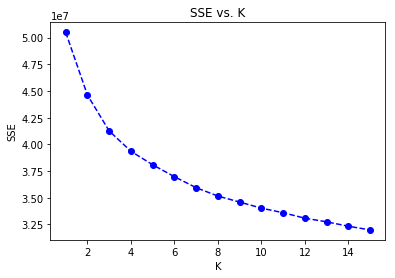

In [65]:
# Investigate the change in within-cluster distance across number of clusters.
# HINT: Use matplotlib's plot function to visualize this relationship.

plt.plot(final.center, final.score, linestyle='--', marker='o', color='b');
plt.xlabel('K');
plt.ylabel('SSE');
plt.title('SSE vs. K');

In [66]:
# Re-fit the k-means model with the selected number of clusters and obtain
# cluster predictions for the general population demographics data.

#instatiate
n_centers = 10
kmeans = KMeans(n_clusters=n_centers)  
kmeans_fitted = kmeans.fit(general_pop_pcatrans)

# Finally predict the labels
labels_gen_pop = kmeans_fitted.predict(general_pop_pcatrans)



In [67]:
kmeans_fitted

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [68]:
labels_gen_pop, kmeans_fitted.labels_

(array([6, 7, 5, ..., 6, 3, 5], dtype=int32),
 array([6, 7, 5, ..., 6, 3, 5], dtype=int32))

### Discussion 3.1: Apply Clustering to General Population

I explored clustering the dataset in to 1 to 15 clusters (center) and visualized the SSE for each configuration. The SSE decreases markedly with each additional cluster for low cluster numbers (e.g 1 - 5 clusters) but the decrease in SSE each additional cluster is responsible for becomes infinitely smaller until there is almost no gain in adding more clusters (centers). I chose to cap the number of centers at 10. There is very little gain (in terms of reducing SSE) with the addition of more clusters. 

### Step 3.2: Apply All Steps to the Customer Data

See how the customer data maps on to those clusters. 

In [69]:
# Load in the customer demographics data.
customers = pd.read_csv('Udacity_CUSTOMERS_Subset.csv', sep=';')

In [70]:
# Apply preprocessing and remove any remaining NA values
customers_clean = clean_data(customers)
customers_clean.dropna(axis='rows', inplace=True)


In [71]:
#check to see shape
customers_clean.shape, general_data.shape


((115643, 103), (623211, 104))

In [72]:
#identify the difference
general_data.columns.difference(customers_clean.columns)

Index(['GEBAEUDETYP_5.0'], dtype='object')

In [73]:
#add in GEBAEUDETYP_5.0 - there must not have been this level in the original customer dataset so just code to zero
#check on this
customers.GEBAEUDETYP.value_counts()
#as I suspected.. level 5 is missing 


1.0    95145
3.0    23655
8.0    20475
2.0     2057
4.0      251
6.0      142
Name: GEBAEUDETYP, dtype: int64

In [74]:
#add in
customers_clean['GEBAEUDETYP_5.0'] = 0

In [75]:
# Apply feature scaling to the customer demographics data.
scaled_cust_data=sc_fitted.transform(customers_clean)


In [76]:
#Apply dimension reduction

#use previously defined pca sklearn object
customer_pcatrans = pca_fitted.transform(scaled_cust_data)


In [77]:
# Apply preprocessing, feature transformation, and clustering from the general
# demographics onto the customer data, obtaining cluster predictions for the
# customer demographics data.

#use previously defined kmeans sklearn object to predict
labels_customers = kmeans_fitted.predict(customer_pcatrans)


In [78]:
kmeans_fitted

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [79]:
np.unique(labels_customers)

array([0, 1, 2, 4, 5, 6, 7, 8, 9], dtype=int32)

### Step 3.3: Compare Customer Data to Demographics Data

Compare the two cluster distributions to see where the strongest customer base for the company is.

- Compute the proportion of data points in each cluster for the general population and the customer data. 
- Include the removed data from before and treat as its own unique cluster for both cases
- Which cluster or clusters are overrepresented in the customer dataset compared to the general population? 

In [80]:
many_missing['labels'] = 999

In [81]:
# Compare the proportion of data in each cluster for the customer data to the
# proportion of data in each cluster for the general population.
np.unique(labels_customers), np.unique(labels_gen_pop)

(array([0, 1, 2, 4, 5, 6, 7, 8, 9], dtype=int32),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32))

In [82]:
#add another label for the many missing (determine the size of many missing and just make it another label and then add on to both labels)
labelsC = pd.DataFrame(np.concatenate((labels_customers, np.repeat(999, many_missing.shape[0]))), columns=['label'])
labelsGP = pd.DataFrame(np.concatenate((labels_gen_pop, np.repeat(999, many_missing.shape[0]))), columns=['label'])


[Text(0,0.5,'Percent')]

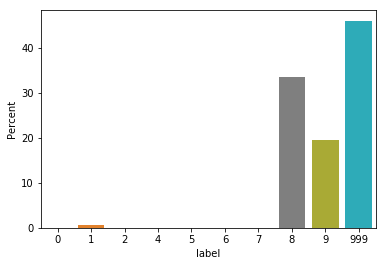

In [83]:
ax = sns.barplot(x="label" , y='label', data=labelsC, estimator=lambda x: len(x) / len(labelsC) * 100)
ax.set(ylabel="Percent")

[Text(0,0.5,'Percent')]

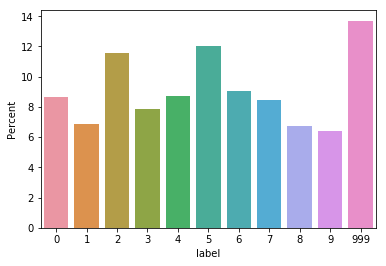

In [84]:
#make a many missing label
ax = sns.barplot(x="label" , y='label', data=labelsGP, estimator=lambda x: len(x) / len(labelsGP) * 100)
ax.set(ylabel="Percent")

In [85]:
customer_pcatrans[len(customer_pcatrans)-1]

array([ -9.3724655 ,  -8.6462137 ,   3.05728613,   7.83435991,
        22.40976433,   8.09300694,  23.60106239, -23.52294654,
       -17.48002071, -14.82909414,  27.54798473,   7.36201933,
        30.56297763,   8.94858777,  31.08110652,  -5.8392871 ,
       -11.64391581,  -7.16652903,  -7.42434756,  -2.13100409,
         3.92753983,  -5.46196427,  -9.98456651,  -4.35725712,
        -4.26531468,   7.97050804,  -9.40948445,   7.44660428,
        -4.55489727,   5.94446896, -12.24348314,   2.58769892,
         3.19198676,  -1.73851021,   0.25758867,  13.72028642,
        -1.77022442,  -8.1379105 ,  15.94468798,  -9.00197012])

In [87]:
# What kinds of people are part of a cluster that is overrepresented in the
# customer data compared to the general population?

cust_w_labels = pd.concat([pd.Series(labels_customers).to_frame('label'), pd.DataFrame(customer_pcatrans)], axis=1)



In [88]:
clustA = cust_w_labels.query('label==8')
clustA.sample(20)

,label,0,1,2,3,4,5,6,7,8,...,30,31,32,33,34,35,36,37,38,39
16820,8,-10.341834,-5.978482,2.415402,9.550571,25.909463,6.155096,22.599895,-25.316207,-14.165587,...,-11.046882,5.415637,3.815377,-4.116493,0.621481,14.801570,-3.486781,-5.424385,16.661631,-8.489281
65298,8,-8.252882,-5.090080,3.365019,11.467428,24.262311,5.732154,20.793498,-22.972999,-15.384242,...,-13.192784,7.413481,2.477240,-1.721178,0.331129,13.939670,-3.662253,-6.028222,18.802425,-9.768867
72126,8,-9.477519,-5.684213,1.948729,8.746530,27.294721,10.515767,25.635839,-31.724390,-17.855885,...,-18.118606,5.143184,3.385934,-4.014030,0.704963,17.267850,-3.867965,-7.088589,20.083837,-11.427071
1867,8,-8.948524,-5.752879,1.860248,5.342018,19.485128,6.485820,16.076901,-17.496455,-15.299934,...,-10.614748,5.190456,2.183099,0.104853,-0.062870,12.969034,-2.686647,-6.335354,12.481977,-9.049838
110304,8,-10.814705,-4.586132,2.729207,8.936830,24.140261,5.685755,24.048376,-24.358065,-14.349217,...,-14.858984,3.246081,2.223803,-3.386529,0.569650,14.604279,-3.615183,-6.229934,17.863671,-9.403335
78182,8,-13.091926,-10.698029,2.757792,17.579665,45.788989,11.044127,41.267142,-46.886714,-25.452000,...,-20.184004,6.844363,2.082521,-4.604218,0.739503,25.946784,-8.472628,-10.196873,30.487111,-14.240129
67693,8,-13.987134,-9.801942,2.801723,15.594347,38.536433,11.208384,38.553146,-39.243273,-23.133589,...,-18.841866,7.680441,3.369502,-3.271614,0.618624,23.052487,-6.319292,-11.697644,25.800542,-15.373864
85414,8,-11.717600,-14.205989,3.395865,12.750058,36.952947,12.944743,36.293823,-40.070480,-22.393968,...,-21.212510,9.468049,2.812955,-3.289174,0.734973,22.690465,-6.231642,-11.793281,27.404437,-17.213913
64061,8,-12.395022,-15.509535,3.742159,19.244083,43.973806,14.548828,39.732993,-46.748327,-26.722408,...,-20.154857,8.533913,2.128503,-4.223295,0.848327,26.638236,-9.023823,-9.374386,30.440047,-15.889325
9537,8,-13.229019,-8.722604,2.428823,9.033501,30.713852,9.018960,26.447116,-31.795450,-18.056785,...,-13.389167,4.567551,3.548517,-3.471837,0.520531,14.870456,-3.621773,-7.528058,21.926710,-10.827320


In [89]:
clustB = cust_w_labels.query('label==9')
clustB.sample(20)

,label,0,1,2,3,4,5,6,7,8,...,30,31,32,33,34,35,36,37,38,39
47936,9,-15.563851,-8.498300,1.157748,12.259965,37.094486,9.725085,31.609368,-35.896030,-19.997266,...,-15.483028,6.700602,-1.537205,-10.174751,1.617300,20.225760,-5.023599,-9.360814,25.203812,-10.924308
70131,9,-12.983990,-6.240090,-1.161283,13.931800,29.682979,8.036616,27.051448,-29.480793,-17.412197,...,-13.740174,7.546308,3.364922,-3.649067,0.597062,16.087910,-4.159091,-8.241567,19.824526,-12.259761
100321,9,-9.346424,-5.095318,-1.916494,12.047741,33.916456,9.507592,32.817280,-36.462034,-21.448532,...,-18.108305,7.944051,2.205051,-4.172477,0.731219,20.230884,-6.695378,-7.926596,23.722419,-12.863784
74590,9,-4.300411,-9.801560,-1.272603,16.446192,44.601232,15.288643,39.785301,-44.673630,-26.168773,...,-23.302228,9.363548,1.788770,-3.686913,0.817002,26.431434,-8.099049,-11.992885,32.718410,-15.603290
80051,9,-13.416006,-9.855135,-2.892406,13.213220,40.309588,10.923916,37.858145,-40.825354,-22.924072,...,-19.107174,7.535660,4.425324,-4.843930,0.812836,22.239327,-5.916494,-9.041821,26.534035,-14.613469
101248,9,-11.440332,-7.043019,-1.753997,12.892928,35.537272,8.496389,32.300676,-34.869326,-21.253696,...,-15.527407,6.905891,4.022697,-4.025791,0.648770,19.442024,-6.240672,-8.522340,23.232675,-12.588665
102257,9,-5.175444,-0.406332,-1.110995,8.265261,24.825700,5.437602,24.098494,-26.654480,-13.935887,...,-10.767966,6.147664,3.529431,-2.479775,0.277974,13.612356,-2.768588,-5.467484,17.951249,-8.373206
58407,9,-12.999171,-3.826719,-0.792900,13.686293,29.636141,7.639181,25.612804,-29.149335,-17.370214,...,-16.413205,6.913723,2.483388,-3.876952,0.658868,17.764309,-5.382464,-7.418685,20.682390,-12.110320
97524,9,-12.552548,-8.464475,-1.481773,13.367321,33.907486,9.823739,31.144780,-35.121564,-20.534120,...,-16.617477,6.127164,4.236994,-4.562286,0.740139,20.257014,-6.036626,-8.936518,23.570458,-12.946336
58475,9,-10.936259,-3.914704,-1.169718,7.686438,25.391590,6.727965,25.341169,-24.563396,-15.524915,...,-10.769050,5.491842,2.340442,-2.498776,0.351797,14.274279,-3.621767,-6.403391,17.159852,-6.009680


Individuals with a **strongly positive PC score** along a certain axis will have a high values for variables with strongly **positive weights** along the same axis. Likewise, individuals with a **negative PC score** will have high values for variables with strongly **negative weights** along the same axis. 

As a reminder the 4 most influential variables along the first PC were: 


>ALTERSKATEGORIE_GROB       0.213941  (Estimated age based on given name analysis)  
>ZABEOTYP_3                 0.199595 (Energy consumption typology- Fair supplied)  
>SEMIO_REL                 -0.212755 (Personality typology - religious level)  
>DECADE                    -0.217915 (Decade of birth - inversely related to age)   

The 4 most influential variable along the second PC were:

>SEMIO_VERT                 0.340002 (Personality typology - dreamful)  
>SEMIO_SOZ                  0.262893 (Personality typology - socially minded)  
>SEMIO_KAEM                -0.333771 (Personality typology - combative attitude)  
>ANREDE_KZ                 -0.360691 (Gender)  

The 4 most influential variable along the third PC were: 

>GREEN_AVANTGARDE           0.350149 (Membership in environmental sustainability )    
>LP_STATUS_GROB_5.0         0.268726 (Social status top earners)  
>KKK                       -0.242060  (Purchasing power in region)  
>MOVEMENT                  -0.290854 (Generational movement)  


For highly represented clusters within the customer dataset many of the samples have strongly negative values along the first PC (0)(the component which explains the most variation in the dataset). This can be interpreted as that they have a high SEMIO_REL level (very low affinity, lowest affinity for religion) and a high decade of birth (80s, 90s). They will have a low value for estimated age. Along the second PC (1) many of them again have strongly negative values. This means they will have a high SEMIO KAEM value (very low affinity, lowest affinity for having a combative attitude) and will have a high value for Gender (higher value is Female). Along the third PC (2) the values are either weakly negative or strongly positive, depending on which customer cluster. This means that a portion of them will have a high value for GREEN_AVANTGARDE (1 being a member of the green movement) and that they have high values LP_STATUS_GROB (they are high earners) and will have low values for KKK (low values denote very high or high purchasing power). Another portion of them may not have as much purchasing power. 

In [91]:
# What kinds of people are part of a cluster that is underrepresented in the
# customer data compared to the general population?

clustC = cust_w_labels.query('label==5')
clustC

,label,0,1,2,3,4,5,6,7,8,...,30,31,32,33,34,35,36,37,38,39
1417,5,-1.700773,0.606839,3.871202,4.546669,22.368372,11.598107,17.046164,-20.128208,-11.287748,...,-9.796532,4.757210,0.498335,-2.850574,0.494681,12.214111,-4.534781,-1.519102,14.719015,-8.872900
2431,5,-1.098198,1.675538,2.851267,6.076534,20.202975,13.982004,19.411937,-18.477888,-10.474034,...,-9.266687,5.507973,3.780563,-6.740926,0.959443,12.264922,-6.029295,4.010850,18.461655,-8.811910
4210,5,0.169965,1.529391,4.253211,6.354628,19.779848,17.144609,19.335874,-18.932088,-8.861611,...,-8.979009,5.087173,2.491890,-7.054752,1.077504,13.482238,-7.067485,7.541941,19.443456,-10.256778
5033,5,-1.376118,1.434244,3.062741,4.891641,20.698913,10.449570,18.169188,-19.636633,-11.088491,...,-10.106344,3.805087,2.066081,-2.101923,0.336825,12.363924,-4.564278,-4.197928,13.226040,-7.400092
5541,5,-0.059487,0.768635,2.582870,8.092616,18.966185,18.139272,17.336795,-17.761379,-11.615335,...,-9.132556,6.034998,3.505666,-7.240387,0.992170,12.751837,-6.356726,6.982020,19.710155,-7.899554
5906,5,1.074600,3.372681,4.779423,9.840382,18.802097,30.420554,16.431659,-17.155660,-8.248042,...,-8.049633,4.950121,5.536670,-16.634225,2.367277,15.093153,-11.565191,23.156274,26.335968,-10.528225
12000,5,1.619666,3.019837,4.238336,7.817190,19.097691,22.327016,18.307196,-17.235682,-7.433661,...,-8.821179,5.137530,3.932286,-10.672478,1.504765,15.515243,-8.393314,13.626946,22.562235,-10.923227
14681,5,-0.073096,-0.194399,3.292518,7.573408,16.382088,21.852057,17.165533,-15.939879,-10.404923,...,-10.076092,6.693946,5.522828,-11.220521,1.642928,13.686114,-7.300228,12.001887,22.232117,-10.357585
14915,5,1.388390,2.409527,4.542282,8.767271,19.130819,22.315476,18.393602,-17.858971,-7.773653,...,-9.162427,5.218352,4.111418,-10.601941,1.536270,15.970658,-8.594488,14.320088,22.239929,-10.895549
14945,5,1.503840,3.544300,4.853811,9.991642,18.616198,30.408103,16.628892,-17.637683,-7.117580,...,-8.693645,5.058214,5.100657,-15.874516,2.286658,15.637446,-10.885317,22.865199,25.906424,-12.222933


In [92]:
clustD = cust_w_labels.query('label==7')
clustD

,label,0,1,2,3,4,5,6,7,8,...,30,31,32,33,34,35,36,37,38,39
6248,7,-0.399198,-3.538464,-0.527303,6.465489,25.705310,7.727450,20.890849,-23.031805,-14.041861,...,-12.277928,4.347207,3.108565,-2.333877,0.379852,14.388100,-4.164179,-5.749548,16.054790,-9.022135
7941,7,-2.273300,-4.133396,-1.873640,4.386668,16.788186,8.000412,18.530003,-17.276320,-10.820105,...,-9.660433,3.224171,-2.473164,-7.071238,1.120300,11.832152,-1.398614,-5.795115,13.884392,-9.080872
11517,7,-0.397853,-1.969594,-1.202805,6.276251,17.832251,5.396332,16.022627,-20.082846,-13.167600,...,-9.353891,5.092723,1.908050,-1.802429,0.319967,9.238296,-2.393231,-4.859070,13.695589,-9.176594
12386,7,-4.440390,-9.021855,-2.507942,11.769066,36.827052,12.395847,32.875381,-41.937507,-24.757544,...,-19.300794,7.097383,2.833326,-3.954707,0.725797,22.760163,-8.597871,-8.491844,28.158625,-14.030074
19098,7,-2.729232,-5.344979,-0.713377,5.897639,22.230415,7.600155,22.681493,-23.869948,-17.174293,...,-13.526308,5.600294,3.204077,-1.443315,0.206553,15.402246,-3.411989,-5.833911,17.391986,-8.420107
19249,7,-0.901465,-2.856518,-0.740193,5.297150,18.206197,5.728389,16.679241,-18.731842,-12.435948,...,-9.847158,3.929038,1.711819,-1.002590,0.211262,11.775659,-3.076130,-4.910788,12.589587,-8.386581
22064,7,-7.891858,-11.744935,-3.024211,11.535636,39.195322,11.955001,35.604944,-41.178166,-22.246846,...,-22.176212,8.309642,1.976096,-4.647621,0.855733,20.931607,-8.121843,-8.322540,23.617131,-15.181422
22182,7,-7.207222,-10.061004,-2.569517,8.769121,32.860025,9.755896,31.964228,-35.744065,-21.294517,...,-14.398192,5.083772,2.108215,-4.682008,0.798368,17.014045,-4.325368,-8.606898,23.434102,-13.643800
23989,7,-1.879384,-3.668754,-0.947519,6.841655,22.961988,4.515733,20.194833,-25.299281,-17.028931,...,-12.741767,4.730721,2.060039,-1.530735,0.207026,14.976545,-3.364582,-5.638294,17.800963,-8.460802
25495,7,-2.102560,-3.108527,-0.243173,2.784220,18.911403,4.059831,16.075101,-20.819190,-13.821215,...,-9.711579,3.558012,1.770629,-1.663686,0.412542,11.469717,-4.322570,-4.140180,12.689224,-10.812429


In [94]:
#look at a cluster in the general population that is not in the customer dataset
GP_w_labels = pd.concat([pd.Series(labels_gen_pop).to_frame('label'), pd.DataFrame(general_pop_pcatrans)], axis=1)
clustE = GP_w_labels.query('label==6')
clustE.sample(20)

,label,0,1,2,3,4,5,6,7,8,...,30,31,32,33,34,35,36,37,38,39
49669,6,3.903919,-1.838711,-2.806130,-1.323469,-0.034605,-1.216038,0.071454,-0.164917,0.141349,...,-0.233915,0.078078,2.497070,-0.132473,-0.056651,-1.570131,-1.670906,-0.360987,0.094749,-0.661515
233689,6,6.239307,-0.918154,-3.239040,1.670600,1.460449,1.381198,-2.574980,-0.260782,0.739549,...,0.707753,0.960425,-0.422432,0.345421,-0.001888,0.661388,-0.843901,1.267173,1.857355,-0.401454
211626,6,5.410115,2.874295,-2.904230,0.428269,0.643055,-0.566662,-0.351236,0.148287,2.212769,...,1.165181,0.019520,0.076207,0.170529,-0.107654,-1.626623,0.087597,-0.191186,0.681499,1.287319
267350,6,3.799644,-2.928771,-2.602974,-1.707605,-1.259627,0.815221,-1.495120,0.717572,1.810680,...,-0.224948,-0.208953,1.882580,-0.666773,0.002437,-0.306634,0.853776,-1.083343,-0.509527,-0.293978
356879,6,2.143392,1.211445,-1.846936,-1.762674,-0.409492,-0.896942,1.297100,0.997938,-3.359753,...,0.556810,0.425093,1.035685,0.463688,-0.185575,-0.553295,0.190442,-2.029296,1.177335,0.800412
113190,6,6.497773,-1.754933,-2.341490,0.763290,-0.492908,-2.395002,-0.339295,0.057221,0.885832,...,-0.236165,1.220929,1.037763,0.206280,-0.041999,0.763962,1.652198,0.822717,0.857839,-0.418833
235404,6,4.707044,-1.431416,-2.723133,0.116346,-1.402925,2.244870,-0.105937,-0.793738,0.409120,...,0.245978,-0.410819,2.858365,0.808911,-0.280552,-1.803612,-0.855633,-1.035202,-1.274134,1.486081
220530,6,2.806826,-0.455652,-3.275605,2.770048,-1.844120,0.138911,0.377561,-0.047302,0.727551,...,-0.877945,-2.575096,0.264524,0.523108,-0.096776,-0.354241,0.436589,-0.933086,0.541849,-0.185154
528822,6,6.035187,-0.489397,-3.726789,1.598202,0.842590,-0.432991,-0.564685,0.874151,1.138082,...,-0.201787,0.394546,-0.867058,0.062755,0.027893,0.615199,0.592845,-0.776320,1.579278,-0.365872
464029,6,4.102617,-2.199449,-2.922515,0.442787,-1.654162,-1.676268,0.831786,0.498097,0.497350,...,0.329353,-0.383486,0.076090,-0.353174,0.043601,0.830134,-0.677330,-0.375364,-0.228687,0.395167


Again, to remind ourselves...

Individuals with a **strongly positive PC score** along a certain axis will have a **high value** for variables with strongly **positive weights** along the same axis. Likewise, individuals with a **negative PC score** will have **high values** for variables with strongly **negative weights** along the same axis. 

As a reminder the 4 most influential variables along the first PC were: 


>ALTERSKATEGORIE_GROB       0.213941  (Estimated age based on given name analysis)  
>ZABEOTYP_3                 0.199595 (Energy consumption typology- Fair supplied)  
>SEMIO_REL                 -0.212755 (Personality typology - religious level)  
>DECADE                    -0.217915 (Decade of birth - inversely related to age)   

The 4 most influential variable along the second PC were:

>SEMIO_VERT                 0.340002 (Personality typology - dreamful)  
>SEMIO_SOZ                  0.262893 (Personality typology - socially minded)  
>SEMIO_KAEM                -0.333771 (Personality typology - combative attitude)  
>ANREDE_KZ                 -0.360691 (Gender)  

The 4 most influential variable along the third PC were: 

>GREEN_AVANTGARDE           0.350149 (Membership in environmental sustainability )    
>LP_STATUS_GROB_5.0         0.268726 (Social status top earners)  
>KKK                       -0.242060  (Purchasing power in region)  
>MOVEMENT                  -0.290854 (Generational movement)  

The kinds of people are part of a cluster that is underrepresented in the customer data can be described as such:

Along the first PC (which explains the most variation in the dataset) many of the individuals have strongly positive weights. This can be interpreted as that, for those that have negative values, they will have a moderately high decade of birth but not at the highest levels. Perhaps in the 60-70s. They will have moderate values for religious type (average religious affinity) and will have a moderate estimated age. Not too high, not too low. Along the second PC (1) for these samples some individuals had weakly positive values and others strongly negative values. This can be interpreted as that those with strongly negative values will have high SEMIO KAEM value (very low affinity, lowest affinity for having a combative attitude) and will have a high value for Gender (higher value is Female). While others may be male and have a higher affinity for a combative attitude. Along the third PC some of the individuals had positive values and some had negative values. As described above, this means that a portion of them will have a high value for GREEN_AVANTGARDE (1 being a member of the green movement) and that they have high values LP_STATUS_GROB (they are high earners) and will have low values for KKK (low values denote very high or high purchasing power). Another portion of them may not have as much purchasing power. 

### Discussion 3.3: Compare Customer Data to Demographics Data
In this project I used a large demographics dataset and applied dimension reduction and clustering techiniques to identify clusters or groups of people in the general population. I broadcasted this framework on to a customer database from a mail order company with the same information to identify which clusters of people in the general population are the target customers for the company. 

The results of this analysis indicated that the mail order company targets very specific portions of the populatio (i.e. the companys customer base is not universal). There were two clusters that were far over-represented in the customer dataset (the target customers). These clusters, or groups of people, can be interpreted as those born in the 80's or 90's with no religious affiliation and are generally memebers of the green movement. Generally, the target customers have high spending power within their region and they are more typically female than male. One general phrase to describe these clusters are "millenials with some money". Population clusters under-represented in the company data are those people born in earlier decades with generally lower purchasing power and who may be more religious. One general phrase to describe these clusters are "baby-boomers who are more socially conservative." 

The findings of this analysis can be used to inform marketing strategies. The company should target their marketing efforts along avenues most followed or consumed by millenials. For example, using social media platforms may be a good way to target the clusters of the population most likely to use the mail order company. Likewise, it may be of little gain to spend money on traditional marketing strategies such as phone or postal efforts which may reach a larger swath of the population but will not focus efforts on the most likely customers. 


